In [1]:
import pandas as pd

In [76]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [30]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
df = pd.read_csv(r'C:\Users\brian\NLP\data\cell_phone_prep_data.csv')

C:\Users\brian\.conda\envs\metis\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66102 entries, 0 to 66101
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    66102 non-null  int64  
 1   overall       66102 non-null  float64
 2   vote          66102 non-null  object 
 3   verified      66102 non-null  bool   
 4   reviewTime    66102 non-null  object 
 5   reviewerID    66102 non-null  object 
 6   asin          66102 non-null  object 
 7   reviewerName  66101 non-null  object 
 8   reviewText    66102 non-null  object 
 9   summary       66102 non-null  object 
 10  title         66102 non-null  object 
 11  brand         66102 non-null  object 
 12  main_cat      66102 non-null  object 
 13  date          65199 non-null  object 
 14  price         11788 non-null  object 
 15  rating        66102 non-null  int64  
 16  token         66102 non-null  object 
 17  spacy_doc     66102 non-null  object 
dtypes: bool(1), float64(1), in

In [8]:
### class to automate extration of each company's dataframe
class company:
    
    def __init__(self, name):
        self.name = name
    
    def dataframe(self, sentiment = 'all'):
        if sentiment == 'pos':
            return df[(df['brand'] == self.name) & (df['rating'] == 1)].reset_index()
        elif sentiment == 'neg':
            return df[(df['brand'] == self.name) & (df['rating'] == 0)].reset_index()
        elif sentiment == 'all':
            return df[(df['brand'] == self.name)].reset_index()

In [34]:
### import spacy to start nlp process
import spacy
import string
nlp = spacy.load('en_core_web_sm')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from gensim import corpora, models, similarities, matutils
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.corpora import Dictionary

In [33]:
# list of punctuation
punctuations = string.punctuation

# list of stop words / add additional stop words
nlp = spacy.load('en_core_web_sm')
nlp.Defaults.stop_words |= {"...", "....", "tv", "samsung", "hisense", 'lg', 'tcl'}
stop_words = nlp.Defaults.stop_words

# create bag of words vectorizer object
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words=stop_words, token_pattern="\\b[a-z][a-z]+\\b")

## Samsung All

In [9]:
samsung = company('Samsung')
all_samsung_df = samsung.dataframe()

In [24]:
corpus = all_samsung_df['reviewText']
count_vectorizer.fit(corpus)
review_word =  count_vectorizer.transform(corpus).transpose()
corpus = matutils.Sparse2Corpus(review_word)
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())
lda = models.LdaModel(corpus=corpus, num_topics=20, id2word=id2word, passes=7)

C:\Users\brian\.conda\envs\metis\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\brian\.conda\envs\metis\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
2021-05-27 00:53:38,697 : INFO : using symmetric alpha at 0.05
2021-05-27 00:53:38,697 : INFO : using symmetric eta at 0.05
2021-05-27 00:53:38,789 : INFO : using serial LDA version on this node
2021-05-27 00:53:40,150 : INFO : running online (multi-pass) LDA training, 20 topics, 7 passes over the supplied corpus of 22031 documents,

2021-05-27 00:53:59,220 : INFO : topic #10 (0.050): 0.002*"great" + 0.002*"picture" + 0.002*"quality" + 0.002*"cable" + 0.001*"hdmi" + 0.001*"set" + 0.001*"hd" + 0.001*"like" + 0.001*"easy assemble" + 0.001*"price"
2021-05-27 00:53:59,235 : INFO : topic #8 (0.050): 0.010*"picture" + 0.010*"sound" + 0.009*"remote" + 0.008*"use" + 0.007*"good" + 0.006*"quality" + 0.006*"hdmi" + 0.006*"cable" + 0.005*"great" + 0.004*"smart"
2021-05-27 00:53:59,243 : INFO : topic #15 (0.050): 0.005*"great" + 0.004*"inch led" + 0.004*"picture" + 0.004*"sound" + 0.003*"works" + 0.003*"good" + 0.002*"roku box" + 0.002*"kitchen" + 0.002*"works great" + 0.002*"set"
2021-05-27 00:53:59,304 : INFO : topic diff=0.333151, rho=0.408248
2021-05-27 00:53:59,354 : INFO : PROGRESS: pass 0, at document #14000/22031
2021-05-27 00:54:01,024 : INFO : merging changes from 2000 documents into a model of 22031 documents
2021-05-27 00:54:01,811 : INFO : topic #0 (0.050): 0.001*"lags" + 0.001*"torn" + 0.000*"imac" + 0.000*"aggra

2021-05-27 00:54:16,608 : INFO : merging changes from 31 documents into a model of 22031 documents
2021-05-27 00:54:17,399 : INFO : topic #18 (0.050): 0.016*"picture" + 0.013*"great" + 0.007*"quality" + 0.007*"like" + 0.006*"amazon" + 0.005*"screen" + 0.005*"price" + 0.005*"better" + 0.005*"time" + 0.005*"buy"
2021-05-27 00:54:17,410 : INFO : topic #12 (0.050): 0.010*"mode looks" + 0.006*"features great" + 0.005*"totally satisfied" + 0.005*"image crisp" + 0.005*"regrets purchase" + 0.003*"chromecast" + 0.002*"great" + 0.002*"picture" + 0.001*"satisfied" + 0.001*"screen"
2021-05-27 00:54:17,419 : INFO : topic #9 (0.050): 0.001*"advertised" + 0.000*"quick delivery" + 0.000*"contacted support" + 0.000*"years problems" + 0.000*"amazon" + 0.000*"easy wall" + 0.000*"works advertised" + 0.000*"makes screen" + 0.000*"ignored" + 0.000*"theres"
2021-05-27 00:54:17,432 : INFO : topic #8 (0.050): 0.015*"remote" + 0.009*"sound" + 0.009*"picture" + 0.009*"hdmi" + 0.008*"works" + 0.008*"use" + 0.007*

2021-05-27 00:54:31,041 : INFO : topic #0 (0.050): 0.001*"lags" + 0.001*"imac" + 0.001*"torn" + 0.000*"going cost" + 0.000*"slow don" + 0.000*"completely useless" + 0.000*"months year" + 0.000*"bright beautiful" + 0.000*"play lot" + 0.000*"crisp image"
2021-05-27 00:54:31,049 : INFO : topic #5 (0.050): 0.001*"adobe" + 0.001*"abilities" + 0.001*"sound terrible" + 0.001*"good happy" + 0.001*"purchase definitely" + 0.000*"connected computer" + 0.000*"way use" + 0.000*"sony products" + 0.000*"turn automatically" + 0.000*"explored"
2021-05-27 00:54:31,110 : INFO : topic diff=0.025492, rho=0.277185
2021-05-27 00:54:31,159 : INFO : PROGRESS: pass 1, at document #12000/22031
2021-05-27 00:54:32,677 : INFO : merging changes from 2000 documents into a model of 22031 documents
2021-05-27 00:54:33,470 : INFO : topic #7 (0.050): 0.018*"link" + 0.012*"product" + 0.010*"ref" + 0.010*"linked" + 0.009*"dp" + 0.009*"dp ref" + 0.009*"ref ie" + 0.009*"product link" + 0.009*"ie" + 0.009*"linked class"
2021

2021-05-27 00:54:45,726 : INFO : topic diff=0.018564, rho=0.277185
2021-05-27 00:54:45,774 : INFO : PROGRESS: pass 1, at document #22000/22031
2021-05-27 00:54:47,264 : INFO : merging changes from 2000 documents into a model of 22031 documents
2021-05-27 00:54:48,081 : INFO : topic #16 (0.050): 0.001*"perfect replacement" + 0.000*"head phone" + 0.000*"months problems" + 0.000*"replacement old" + 0.000*"phone jack" + 0.000*"great stars" + 0.000*"dynex" + 0.000*"lightweight great" + 0.000*"place stand" + 0.000*"ohio"
2021-05-27 00:54:48,095 : INFO : topic #19 (0.050): 0.001*"remote don" + 0.001*"christmas gift" + 0.001*"fits bill" + 0.001*"common issue" + 0.001*"people think" + 0.001*"goes bad" + 0.000*"settings adjusted" + 0.000*"lcd didn" + 0.000*"quality crisp" + 0.000*"great fantastic"
2021-05-27 00:54:48,132 : INFO : topic #1 (0.050): 0.001*"lawsuit" + 0.001*"action lawsuit" + 0.001*"cost fix" + 0.001*"class action" + 0.001*"great item" + 0.001*"thing works" + 0.001*"absolutely best

2021-05-27 00:55:01,913 : INFO : topic #4 (0.050): 0.002*"goodbye" + 0.002*"bubble" + 0.002*"electrical" + 0.002*"viera" + 0.002*"love new" + 0.002*"es" + 0.001*"de" + 0.001*"excelente" + 0.001*"perfect bedroom" + 0.001*"panasonic viera"
2021-05-27 00:55:01,921 : INFO : topic #18 (0.050): 0.015*"picture" + 0.013*"great" + 0.009*"amazon" + 0.007*"quality" + 0.007*"price" + 0.006*"like" + 0.005*"time" + 0.005*"buy" + 0.005*"best" + 0.005*"hd"
2021-05-27 00:55:01,930 : INFO : topic #14 (0.050): 0.001*"great pic" + 0.001*"son room" + 0.001*"wasn expecting" + 0.000*"sceptre" + 0.000*"problems great" + 0.000*"picure" + 0.000*"different sizes" + 0.000*"got son" + 0.000*"realism" + 0.000*"teenage"
2021-05-27 00:55:01,948 : INFO : topic #6 (0.050): 0.013*"set" + 0.009*"good" + 0.008*"picture" + 0.008*"screen" + 0.005*"settings" + 0.005*"color" + 0.004*"like" + 0.004*"viewing" + 0.004*"room" + 0.004*"plasma"
2021-05-27 00:55:02,012 : INFO : topic diff=0.020059, rho=0.267113
2021-05-27 00:55:02,0

2021-05-27 00:55:14,232 : INFO : topic #9 (0.050): 0.001*"theres" + 0.001*"quick delivery" + 0.001*"easy wall" + 0.001*"product recommend" + 0.000*"contacted support" + 0.000*"pool" + 0.000*"arrived promptly" + 0.000*"got bedroom" + 0.000*"product love" + 0.000*"ignored"
2021-05-27 00:55:14,300 : INFO : topic diff=0.004523, rho=0.267113
2021-05-27 00:55:16,983 : INFO : -18.531 per-word bound, 378868.9 perplexity estimate based on a held-out corpus of 2000 documents with 145966 words
2021-05-27 00:55:16,984 : INFO : PROGRESS: pass 2, at document #20000/22031
2021-05-27 00:55:18,381 : INFO : merging changes from 2000 documents into a model of 22031 documents
2021-05-27 00:55:19,209 : INFO : topic #6 (0.050): 0.012*"set" + 0.009*"good" + 0.008*"picture" + 0.008*"screen" + 0.006*"settings" + 0.005*"color" + 0.005*"like" + 0.005*"viewing" + 0.004*"better" + 0.004*"black"
2021-05-27 00:55:19,219 : INFO : topic #3 (0.050): 0.001*"hard drives" + 0.001*"love easy" + 0.001*"knew going" + 0.001*"

2021-05-27 00:55:32,055 : INFO : merging changes from 2000 documents into a model of 22031 documents
2021-05-27 00:55:32,938 : INFO : topic #3 (0.050): 0.004*"starter" + 0.001*"month far" + 0.001*"sound best" + 0.001*"larger size" + 0.001*"hard drives" + 0.001*"clear easy" + 0.001*"definitely purchase" + 0.001*"service rep" + 0.001*"week delivery" + 0.001*"love easy"
2021-05-27 00:55:32,952 : INFO : topic #18 (0.050): 0.015*"picture" + 0.012*"great" + 0.010*"amazon" + 0.007*"price" + 0.007*"quality" + 0.006*"buy" + 0.005*"time" + 0.005*"like" + 0.005*"best" + 0.005*"hd"
2021-05-27 00:55:32,969 : INFO : topic #17 (0.050): 0.002*"inky" + 0.001*"external hard" + 0.001*"guest" + 0.001*"guest room" + 0.001*"works expected" + 0.001*"workaround" + 0.001*"lot windows" + 0.001*"matt" + 0.001*"better better" + 0.001*"love products"
2021-05-27 00:55:32,978 : INFO : topic #8 (0.050): 0.013*"sound" + 0.012*"remote" + 0.010*"cable" + 0.010*"hdmi" + 0.010*"picture" + 0.009*"use" + 0.006*"quality" + 0

2021-05-27 00:55:45,456 : INFO : topic #4 (0.050): 0.002*"excelente" + 0.002*"perfect bedroom" + 0.001*"viera" + 0.001*"good like" + 0.001*"love new" + 0.001*"hard use" + 0.001*"household" + 0.001*"bubble" + 0.001*"electrical" + 0.001*"service provider"
2021-05-27 00:55:45,465 : INFO : topic #2 (0.050): 0.001*"pdf" + 0.001*"work right" + 0.000*"linkstick" + 0.000*"features excellent" + 0.000*"wireless lan" + 0.000*"lan adapter" + 0.000*"worth purchase" + 0.000*"afford buy" + 0.000*"kitchen cabinet" + 0.000*"sony hd"
2021-05-27 00:55:45,525 : INFO : topic diff=0.020994, rho=0.258066
2021-05-27 00:55:45,574 : INFO : PROGRESS: pass 3, at document #18000/22031
2021-05-27 00:55:47,039 : INFO : merging changes from 2000 documents into a model of 22031 documents
2021-05-27 00:55:47,837 : INFO : topic #14 (0.050): 0.001*"son room" + 0.001*"great pic" + 0.001*"problems great" + 0.001*"sceptre" + 0.000*"realism" + 0.000*"wasn expecting" + 0.000*"different sizes" + 0.000*"watch big" + 0.000*"colo

2021-05-27 00:56:00,731 : INFO : topic #18 (0.050): 0.014*"picture" + 0.014*"great" + 0.010*"amazon" + 0.007*"price" + 0.006*"quality" + 0.006*"buy" + 0.006*"time" + 0.005*"hd" + 0.005*"bought" + 0.005*"like"
2021-05-27 00:56:00,793 : INFO : topic diff=0.054617, rho=0.249879
2021-05-27 00:56:00,877 : INFO : PROGRESS: pass 4, at document #4000/22031
2021-05-27 00:56:02,646 : INFO : merging changes from 2000 documents into a model of 22031 documents
2021-05-27 00:56:03,448 : INFO : topic #19 (0.050): 0.003*"excellent money" + 0.001*"remote don" + 0.001*"dining" + 0.001*"lcd didn" + 0.001*"christmas gift" + 0.001*"common issue" + 0.001*"goes bad" + 0.001*"dining room" + 0.001*"fits bill" + 0.001*"people think"
2021-05-27 00:56:03,457 : INFO : topic #2 (0.050): 0.001*"wireless lan" + 0.001*"pdf" + 0.001*"linkstick" + 0.001*"sony hd" + 0.000*"lan adapter" + 0.000*"afford buy" + 0.000*"work right" + 0.000*"worth purchase" + 0.000*"features excellent" + 0.000*"months good"
2021-05-27 00:56:03

2021-05-27 00:56:15,852 : INFO : topic #10 (0.050): 0.001*"ve issues" + 0.001*"function works" + 0.001*"easy assemble" + 0.001*"tvs like" + 0.001*"gaming mode" + 0.001*"maker" + 0.001*"bargain price" + 0.001*"work advertised" + 0.001*"small great" + 0.001*"cool features"
2021-05-27 00:56:15,862 : INFO : topic #4 (0.050): 0.002*"viera" + 0.002*"perfect bedroom" + 0.002*"good like" + 0.002*"love new" + 0.001*"excelente" + 0.001*"es" + 0.001*"panasonic viera" + 0.001*"bubble" + 0.001*"network connection" + 0.001*"electrical"
2021-05-27 00:56:15,871 : INFO : topic #12 (0.050): 0.003*"features great" + 0.002*"streaming netflix" + 0.002*"mode looks" + 0.001*"url" + 0.001*"play movies" + 0.001*"curtains" + 0.001*"totally satisfied" + 0.001*"led tvs" + 0.001*"screen looks" + 0.001*"image crisp"
2021-05-27 00:56:15,883 : INFO : topic #18 (0.050): 0.015*"picture" + 0.015*"great" + 0.010*"amazon" + 0.007*"price" + 0.007*"quality" + 0.006*"buy" + 0.006*"time" + 0.005*"like" + 0.005*"bought" + 0.00

2021-05-27 00:56:31,036 : INFO : topic #5 (0.050): 0.000*"sound terrible" + 0.000*"good happy" + 0.000*"purchase definitely" + 0.000*"adobe" + 0.000*"love colors" + 0.000*"connected computer" + 0.000*"wife happy" + 0.000*"warcraft" + 0.000*"explored" + 0.000*"money don"
2021-05-27 00:56:31,043 : INFO : topic #7 (0.050): 0.011*"product" + 0.009*"link" + 0.006*"great product" + 0.005*"ref" + 0.005*"nbsp" + 0.005*"dp" + 0.005*"ref ie" + 0.005*"ie" + 0.005*"linked" + 0.005*"dp ref"
2021-05-27 00:56:31,110 : INFO : topic diff=0.022816, rho=0.249879
2021-05-27 00:56:31,311 : INFO : PROGRESS: pass 5, at document #2000/22031
2021-05-27 00:56:33,096 : INFO : merging changes from 2000 documents into a model of 22031 documents
2021-05-27 00:56:33,911 : INFO : topic #3 (0.050): 0.001*"love easy" + 0.001*"hard drives" + 0.001*"month far" + 0.001*"clear easy" + 0.001*"sound best" + 0.001*"larger size" + 0.000*"knew going" + 0.000*"having use" + 0.000*"service rep" + 0.000*"buy larger"
2021-05-27 00:

2021-05-27 00:56:46,570 : INFO : topic #18 (0.050): 0.015*"great" + 0.015*"picture" + 0.011*"amazon" + 0.008*"price" + 0.007*"quality" + 0.006*"buy" + 0.006*"time" + 0.005*"bought" + 0.005*"got" + 0.005*"like"
2021-05-27 00:56:46,577 : INFO : topic #14 (0.050): 0.001*"great pic" + 0.001*"wasn expecting" + 0.001*"sceptre" + 0.001*"problems great" + 0.000*"son room" + 0.000*"colors sound" + 0.000*"delivered unpacked" + 0.000*"watch big" + 0.000*"got son" + 0.000*"different sizes"
2021-05-27 00:56:46,585 : INFO : topic #2 (0.050): 0.001*"pdf" + 0.001*"linkstick" + 0.001*"features excellent" + 0.001*"wireless lan" + 0.001*"lan adapter" + 0.000*"work right" + 0.000*"kitchen cabinet" + 0.000*"picture compared" + 0.000*"shipping cost" + 0.000*"linkstick wireless"
2021-05-27 00:56:46,594 : INFO : topic #3 (0.050): 0.002*"starter" + 0.001*"larger size" + 0.001*"hard drives" + 0.001*"clear easy" + 0.001*"sound best" + 0.001*"love easy" + 0.001*"having use" + 0.001*"month far" + 0.001*"output jac

2021-05-27 00:57:00,622 : INFO : topic #17 (0.050): 0.002*"guest" + 0.002*"inky" + 0.002*"guest room" + 0.001*"external hard" + 0.001*"works expected" + 0.001*"workaround" + 0.001*"love products" + 0.001*"guest bedroom" + 0.001*"thank god" + 0.001*"better better"
2021-05-27 00:57:00,684 : INFO : topic diff=0.005935, rho=0.242425
2021-05-27 00:57:01,753 : INFO : -18.615 per-word bound, 401585.0 perplexity estimate based on a held-out corpus of 31 documents with 1459 words
2021-05-27 00:57:01,754 : INFO : PROGRESS: pass 5, at document #22031/22031
2021-05-27 00:57:02,476 : INFO : merging changes from 31 documents into a model of 22031 documents
2021-05-27 00:57:03,264 : INFO : topic #4 (0.050): 0.006*"bubble" + 0.005*"goodbye" + 0.001*"love new" + 0.001*"good like" + 0.001*"network connection" + 0.001*"perfect bedroom" + 0.001*"star reviews" + 0.001*"excelente" + 0.001*"household" + 0.001*"electrical"
2021-05-27 00:57:03,272 : INFO : topic #10 (0.050): 0.006*"ve issues" + 0.006*"function

2021-05-27 00:57:15,918 : INFO : topic #8 (0.050): 0.014*"sound" + 0.013*"remote" + 0.012*"use" + 0.011*"picture" + 0.009*"hdmi" + 0.009*"cable" + 0.009*"smart" + 0.008*"good" + 0.008*"great" + 0.006*"quality"
2021-05-27 00:57:15,926 : INFO : topic #5 (0.050): 0.001*"adobe" + 0.001*"sound terrible" + 0.001*"abilities" + 0.001*"good happy" + 0.001*"purchase definitely" + 0.000*"connected computer" + 0.000*"way use" + 0.000*"turn automatically" + 0.000*"sony products" + 0.000*"explored"
2021-05-27 00:57:15,938 : INFO : topic #18 (0.050): 0.015*"great" + 0.014*"picture" + 0.011*"amazon" + 0.008*"price" + 0.006*"buy" + 0.006*"quality" + 0.006*"time" + 0.006*"bought" + 0.005*"got" + 0.005*"new"
2021-05-27 00:57:15,952 : INFO : topic #3 (0.050): 0.002*"starter" + 0.001*"larger size" + 0.001*"love easy" + 0.001*"sound best" + 0.001*"hard drives" + 0.001*"month far" + 0.001*"knew going" + 0.001*"clear easy" + 0.001*"definitely purchase" + 0.001*"buy larger"
2021-05-27 00:57:15,964 : INFO : top

2021-05-27 00:57:30,114 : INFO : topic #7 (0.050): 0.013*"link" + 0.008*"product" + 0.008*"ref" + 0.008*"nbsp" + 0.007*"ie" + 0.007*"ref ie" + 0.007*"dp" + 0.007*"linked" + 0.007*"class" + 0.006*"dp ref"
2021-05-27 00:57:30,123 : INFO : topic #15 (0.050): 0.003*"inch led" + 0.002*"roku box" + 0.002*"bump" + 0.001*"dorm" + 0.001*"good clear" + 0.001*"mounting holes" + 0.001*"kitchen counter" + 0.001*"shooting" + 0.001*"need new" + 0.001*"good works"
2021-05-27 00:57:30,143 : INFO : topic #13 (0.050): 0.001*"remote simple" + 0.001*"crashing" + 0.001*"wish hdmi" + 0.001*"consuming" + 0.001*"great wish" + 0.001*"icing" + 0.001*"severely" + 0.001*"time consuming" + 0.001*"icing cake" + 0.001*"extremely disappointed"
2021-05-27 00:57:30,204 : INFO : topic diff=0.012335, rho=0.235601
2021-05-27 00:57:30,249 : INFO : PROGRESS: pass 6, at document #22000/22031
2021-05-27 00:57:31,776 : INFO : merging changes from 2000 documents into a model of 22031 documents
2021-05-27 00:57:32,606 : INFO : to

In [25]:
lda.print_topics()

C:\Users\brian\.conda\envs\metis\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2021-05-27 00:57:45,527 : INFO : topic #0 (0.050): 0.001*"lags" + 0.001*"imac" + 0.000*"ot" + 0.000*"crisp image" + 0.000*"torn" + 0.000*"aggravation" + 0.000*"love buy" + 0.000*"completely useless" + 0.000*"going cost" + 0.000*"months year"
2021-05-27 00:57:45,535 : INFO : topic #1 (0.050): 0.001*"lawsuit" + 0.001*"action lawsuit" + 0.001*"cost fix" + 0.000*"great item" + 0.000*"thing works" + 0.000*"understood" + 0.000*"absolutely best" + 0.000*"buy months" + 0.000*"great able" + 0.000*"malfunctioning"
2021-05-27 00:57:45,543 : INFO : topic #2 (0.050): 0.001*"work right" + 0.000*"features excellent" + 0.000*"wireless lan" + 

[(0,
  '0.001*"lags" + 0.001*"imac" + 0.000*"ot" + 0.000*"crisp image" + 0.000*"torn" + 0.000*"aggravation" + 0.000*"love buy" + 0.000*"completely useless" + 0.000*"going cost" + 0.000*"months year"'),
 (1,
  '0.001*"lawsuit" + 0.001*"action lawsuit" + 0.001*"cost fix" + 0.000*"great item" + 0.000*"thing works" + 0.000*"understood" + 0.000*"absolutely best" + 0.000*"buy months" + 0.000*"great able" + 0.000*"malfunctioning"'),
 (2,
  '0.001*"work right" + 0.000*"features excellent" + 0.000*"wireless lan" + 0.000*"pdf" + 0.000*"afford buy" + 0.000*"excellent excellent" + 0.000*"worth purchase" + 0.000*"linkstick" + 0.000*"sony hd" + 0.000*"clarity excellent"'),
 (3,
  '0.001*"love easy" + 0.001*"hard drives" + 0.001*"knew going" + 0.001*"sound best" + 0.000*"larger size" + 0.000*"clear easy" + 0.000*"starter" + 0.000*"alert" + 0.000*"output jack" + 0.000*"month far"'),
 (4,
  '0.006*"bubble" + 0.005*"goodbye" + 0.001*"love new" + 0.001*"good like" + 0.001*"network connection" + 0.001*"pe

In [26]:
dictionary = Dictionary([list(count_vectorizer.vocabulary_.keys())])
vis = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis)

C:\Users\brian\.conda\envs\metis\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2021-05-27 00:58:02,411 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-05-27 00:58:05,894 : INFO : built Dictionary(628536 unique tokens: ['aa', 'aa batteries', 'aa canon', 'aa completely', 'aa customer']...) from 1 documents (total 628536 corpus positions)
2021-05-27 00:58:05,895 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(628536 unique tokens: ['aa', 'aa batteries', 'aa canon', 'aa completely', 'aa customer']...) from 1 documents (total 628536 corpus positions)", 'datetime': '2021-05-27T00:58:05.895500', 'gensim': '4.0.1', 'python': '3.8.8 | packaged by conda-forge | (default, Feb 20 20

**Summary : Samsung all**  
1. before topics -> great/beautiful/remote(we will see why)/black   
2. 3 main topics  
3. topic 1(35%, R=0) - warranty/repair/fragile/dropped/defect/customer support (R=1) - great picture quality  
4. topic 2(34%, R=0) - black levels                                            (R=1) - picture/good/better/like  
5. topic 3(28.1% R=0) - works perfectly, hdmi connections, laptop              (R=1) - remote/good/works/great
6. topic 4~9 mostly positive(topic 6 - brief mention of network connection)
7. topic 10(0.1%) - lawsuit/action lawsuit/cost fix

## Hisense all

In [192]:
hisense = company('Hisense')
df1 = hisense.dataframe()

In [193]:
corpus = df1['reviewText']
count_vectorizer.fit(corpus)
review_word =  count_vectorizer.transform(corpus).transpose()
corpus = matutils.Sparse2Corpus(review_word)
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())
lda = models.LdaModel(corpus=corpus, num_topics=20, id2word=id2word, passes=10)

2021-05-27 20:14:30,864 : INFO : using symmetric alpha at 0.05
2021-05-27 20:14:30,865 : INFO : using symmetric eta at 0.05
2021-05-27 20:14:30,869 : INFO : using serial LDA version on this node
2021-05-27 20:14:30,930 : INFO : running online (multi-pass) LDA training, 20 topics, 10 passes over the supplied corpus of 570 documents, updating model once every 570 documents, evaluating perplexity every 570 documents, iterating 50x with a convergence threshold of 0.001000
2021-05-27 20:14:31,736 : INFO : -26.894 per-word bound, 124723547.1 perplexity estimate based on a held-out corpus of 570 documents with 52514 words
2021-05-27 20:14:31,737 : INFO : PROGRESS: pass 0, at document #570/570
2021-05-27 20:14:32,216 : INFO : topic #7 (0.050): 0.004*"picture" + 0.003*"price" + 0.003*"sound" + 0.003*"great" + 0.003*"good" + 0.003*"screen" + 0.003*"quality" + 0.002*"smart" + 0.002*"like" + 0.002*"remote"
2021-05-27 20:14:32,217 : INFO : topic #16 (0.050): 0.006*"picture" + 0.005*"good" + 0.005*"

2021-05-27 20:14:36,686 : INFO : topic #13 (0.050): 0.007*"great" + 0.007*"picture" + 0.005*"like" + 0.005*"good" + 0.005*"price" + 0.004*"remote" + 0.004*"roku" + 0.003*"love" + 0.003*"bought" + 0.003*"screen"
2021-05-27 20:14:36,689 : INFO : topic diff=0.379095, rho=0.377964
2021-05-27 20:14:37,399 : INFO : -9.998 per-word bound, 1022.9 perplexity estimate based on a held-out corpus of 570 documents with 52514 words
2021-05-27 20:14:37,400 : INFO : PROGRESS: pass 6, at document #570/570
2021-05-27 20:14:37,660 : INFO : topic #19 (0.050): 0.005*"great" + 0.005*"picture" + 0.004*"good" + 0.003*"sound" + 0.003*"amazon" + 0.003*"apps" + 0.002*"store" + 0.002*"price" + 0.002*"ve" + 0.002*"got"
2021-05-27 20:14:37,661 : INFO : topic #16 (0.050): 0.009*"picture" + 0.008*"sound" + 0.006*"good" + 0.005*"set" + 0.003*"time" + 0.003*"settings" + 0.003*"like" + 0.003*"easy" + 0.003*"use" + 0.003*"great"
2021-05-27 20:14:37,665 : INFO : topic #10 (0.050): 0.004*"great" + 0.003*"price" + 0.003*"am

**Hisense all Review_topic distribution**

In [194]:
df1 = df1.reset_index()

In [196]:
df1['topics'] = lda.get_document_topics(corpus)

sf = pd.DataFrame(data=df1['topics'])
af = pd.DataFrame()

for i in range(20):
    af[str(i)]=[]

frames = [sf,af]
af = pd.concat(frames).fillna(0)

for i in range(570):
    for j in range(len(df1['topics'][i])):
        af[str(df1['topics'][i][j][0])].loc[i] = df1['topics'][i][j][1]

C:\Users\brian\.conda\envs\metis\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
C:\Users\brian\.conda\envs\metis\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [197]:
review_topic_df = pd.concat([df1, af], axis=1)

In [199]:
total_brand = review_topic_df.groupby(['rating']).agg({'0':'mean', '1':'mean', '2':'mean', '3':'mean', '4':'mean', '5':'mean', 
                                         '6':'mean', '7':'mean', '8':'mean', '9':'mean', '10':'mean', '11':'mean',
                                         '12':'mean', '13':'mean', '14':'mean', '15':'mean', '16':'mean', '17':'mean', '18':'mean', '19':'mean'})

In [200]:
total_brand

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
rating,,,,,,,,,,,,,,,,,,,,
0,0.066492,0.041954,0.079744,0.041393,0.085166,0.052652,0.042925,0.042189,0.031932,0.010439,0.043260,0.064186,0.041774,0.022052,0.031344,0.021431,0.054042,0.095933,0.062920,0.042482
1,0.050461,0.045007,0.061116,0.084520,0.041315,0.032432,0.083767,0.040736,0.026842,0.036048,0.039089,0.018346,0.038867,0.069840,0.015225,0.043576,0.069888,0.056345,0.073646,0.037240


In [201]:
total_brand = total_brand.reset_index()
del total_brand['rating']
total_brand = total_brand.transpose()

In [204]:
total_brand

,0,1
0,0.066492,0.050461
1,0.041954,0.045007
2,0.079744,0.061116
3,0.041393,0.084520
4,0.085166,0.041315
5,0.052652,0.032432
6,0.042925,0.083767
7,0.042189,0.040736
8,0.031932,0.026842
9,0.010439,0.036048


2021-05-27 20:32:02,122 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-05-27 20:32:02,126 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-05-27 20:32:02,172 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-05-27 20:32:02,176 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'Mean Topic Distribution for Neg VS Pos of Hisense')

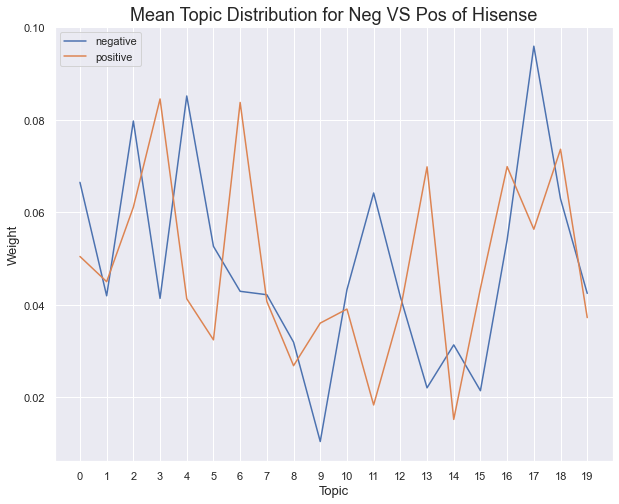

In [214]:
figure(figsize=(10, 8))
sns.lineplot(x=total_brand.index, y=0, data=total_brand)
sns.lineplot(x=total_brand.index, y=1, data=total_brand)
plt.legend(['negative', 'positive'])
plt.xlabel('Topic', fontsize = 13)
plt.ylabel('Weight', fontsize = 13)
plt.title('Mean Topic Distribution for Neg VS Pos of Hisense', fontsize = 18)

negative = topics 4,11,17  
positive = topics 3,6,13

lda.print_topics()

In [38]:
dictionary = Dictionary([list(count_vectorizer.vocabulary_.keys())])
vis = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis)

2021-05-27 01:28:12,985 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-05-27 01:28:13,070 : INFO : built Dictionary(25554 unique tokens: ['aaaand', 'aaaand nope', 'abilities', 'abilities frustration', 'abilities looks']...) from 1 documents (total 25554 corpus positions)
2021-05-27 01:28:13,071 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(25554 unique tokens: ['aaaand', 'aaaand nope', 'abilities', 'abilities frustration', 'abilities looks']...) from 1 documents (total 25554 corpus positions)", 'datetime': '2021-05-27T01:28:13.071980', 'gensim': '4.0.1', 'python': '3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 15:50:08) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}


**Summary Hisense all**  
1. overall - great/price/hdr/network
2. topic 1(9%) - picture/great/price/hdr
3. topic 2(8.4% R=0) - dimming/local dimming/darken  (R=1) - picture/great/quality
4. topic 17(2.8%) - skin/skin softening/extreme skin/motion (ultra smooth motion)

In [40]:
# look at the review with the skin/ skin softening issue
df[df['reviewText'].astype(str).str.contains("skin softening", na='False')]

,Unnamed: 0,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,title,brand,main_cat,date,price,rating,token,spacy_doc
55543,5541628,3.0,63,False,"10 17, 2015",A3M7BCQKSQAK4L,B00XMUU5KU,A Family Effort,"Even though I had never heard of this brand, I...",A mix of great and not so great....,Hisense 50H7GB2 50-Inch 4K Ultra HD Smart LED ...,Hisense,All Electronics,"August 1, 2015",NaN,0,"['hear', 'brand', 'excited', 'enjoy', 'want', ...","Even though I had never heard of this brand, I..."


## LG All

In [42]:
lg = company('LG')
df1 = lg.dataframe()

In [43]:
corpus = df1['reviewText']
count_vectorizer.fit(corpus)
review_word =  count_vectorizer.transform(corpus).transpose()
corpus = matutils.Sparse2Corpus(review_word)
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())
lda = models.LdaModel(corpus=corpus, num_topics=20, id2word=id2word, passes=10)

2021-05-27 02:02:44,884 : INFO : using symmetric alpha at 0.05
2021-05-27 02:02:44,885 : INFO : using symmetric eta at 0.05
2021-05-27 02:02:44,953 : INFO : using serial LDA version on this node
2021-05-27 02:02:45,784 : INFO : running online (multi-pass) LDA training, 20 topics, 10 passes over the supplied corpus of 10227 documents, updating model once every 2000 documents, evaluating perplexity every 10227 documents, iterating 50x with a convergence threshold of 0.001000
2021-05-27 02:02:45,840 : INFO : PROGRESS: pass 0, at document #2000/10227
2021-05-27 02:02:48,297 : INFO : merging changes from 2000 documents into a model of 10227 documents
2021-05-27 02:02:48,778 : INFO : topic #15 (0.050): 0.004*"set" + 0.004*"picture" + 0.004*"great" + 0.003*"good" + 0.002*"remote" + 0.002*"like" + 0.002*"use" + 0.002*"quality" + 0.002*"sound" + 0.002*"bought"
2021-05-27 02:02:48,783 : INFO : topic #11 (0.050): 0.008*"great" + 0.007*"picture" + 0.004*"good" + 0.003*"set" + 0.003*"quality" + 0.0

2021-05-27 02:03:01,096 : INFO : topic diff=0.321583, rho=0.408248
2021-05-27 02:03:01,182 : INFO : PROGRESS: pass 1, at document #2000/10227
2021-05-27 02:03:03,769 : INFO : merging changes from 2000 documents into a model of 10227 documents
2021-05-27 02:03:04,331 : INFO : topic #10 (0.050): 0.001*"blah" + 0.001*"blah blah" + 0.001*"self explanatory" + 0.001*"explanatory" + 0.000*"screen best" + 0.000*"bar works" + 0.000*"exciting" + 0.000*"glasses way" + 0.000*"great seller" + 0.000*"picture"
2021-05-27 02:03:04,337 : INFO : topic #0 (0.050): 0.008*"remote" + 0.007*"screen" + 0.006*"picture" + 0.005*"like" + 0.004*"video" + 0.004*"great" + 0.004*"use" + 0.004*"problem" + 0.004*"time" + 0.004*"good"
2021-05-27 02:03:04,347 : INFO : topic #13 (0.050): 0.001*"ones don" + 0.001*"delivered time" + 0.001*"ok great" + 0.000*"en" + 0.000*"el" + 0.000*"lo" + 0.000*"movie playing" + 0.000*"sanus" + 0.000*"producto" + 0.000*"condiciones"
2021-05-27 02:03:04,356 : INFO : topic #7 (0.050): 0.000

2021-05-27 02:03:15,868 : INFO : topic #13 (0.050): 0.001*"delivered time" + 0.001*"ones don" + 0.001*"ok great" + 0.000*"sanus" + 0.000*"movie playing" + 0.000*"good expected" + 0.000*"en" + 0.000*"price pleased" + 0.000*"lo" + 0.000*"nice unit"
2021-05-27 02:03:15,875 : INFO : topic #0 (0.050): 0.012*"remote" + 0.008*"screen" + 0.005*"like" + 0.004*"problem" + 0.004*"picture" + 0.004*"video" + 0.004*"time" + 0.004*"service" + 0.004*"warranty" + 0.004*"use"
2021-05-27 02:03:15,883 : INFO : topic #19 (0.050): 0.007*"color" + 0.005*"tint" + 0.005*"ire" + 0.003*"green" + 0.003*"green blue" + 0.003*"red green" + 0.003*"red" + 0.003*"white balance" + 0.003*"expert" + 0.003*"luminance"
2021-05-27 02:03:15,929 : INFO : topic diff=0.066372, rho=0.374937
2021-05-27 02:03:16,002 : INFO : PROGRESS: pass 2, at document #2000/10227
2021-05-27 02:03:17,908 : INFO : merging changes from 2000 documents into a model of 10227 documents
2021-05-27 02:03:18,465 : INFO : topic #16 (0.050): 0.001*"black so

2021-05-27 02:03:27,841 : INFO : topic diff=0.024778, rho=0.351072
2021-05-27 02:03:28,799 : INFO : -17.926 per-word bound, 249041.6 perplexity estimate based on a held-out corpus of 227 documents with 13421 words
2021-05-27 02:03:28,800 : INFO : PROGRESS: pass 2, at document #10227/10227
2021-05-27 02:03:29,398 : INFO : merging changes from 227 documents into a model of 10227 documents
2021-05-27 02:03:29,976 : INFO : topic #8 (0.050): 0.003*"good" + 0.002*"gp" + 0.002*"com gp" + 0.001*"gp product" + 0.001*"www amazon" + 0.001*"great setup" + 0.001*"http www" + 0.001*"www" + 0.001*"bedroom great" + 0.001*"great purchased"
2021-05-27 02:03:29,984 : INFO : topic #7 (0.050): 0.000*"covered warranty" + 0.000*"enclosed" + 0.000*"detailed reviews" + 0.000*"different input" + 0.000*"happy item" + 0.000*"compatible amazon" + 0.000*"popcorn" + 0.000*"wifi connections" + 0.000*"lots great" + 0.000*"complaint audio"
2021-05-27 02:03:29,991 : INFO : topic #11 (0.050): 0.003*"works great" + 0.003*

2021-05-27 02:03:39,088 : INFO : topic #16 (0.050): 0.001*"phone tablet" + 0.001*"bowl" + 0.001*"super bowl" + 0.001*"meh" + 0.001*"optical sound" + 0.001*"oddly" + 0.001*"black sound" + 0.000*"buying smart" + 0.000*"step step" + 0.000*"warranty purchased"
2021-05-27 02:03:39,094 : INFO : topic #2 (0.050): 0.002*"excelente" + 0.001*"product good" + 0.001*"shipper" + 0.001*"ive owned" + 0.001*"extremely thin" + 0.001*"features quality" + 0.001*"powered glasses" + 0.001*"battery powered" + 0.000*"clarity great" + 0.000*"producto"
2021-05-27 02:03:39,100 : INFO : topic #10 (0.050): 0.001*"blah blah" + 0.001*"blah" + 0.001*"bar works" + 0.000*"great seller" + 0.000*"net flix" + 0.000*"flix" + 0.000*"explanatory" + 0.000*"sony bluray" + 0.000*"exciting" + 0.000*"accepted"
2021-05-27 02:03:39,108 : INFO : topic #12 (0.050): 0.014*"great" + 0.007*"audio" + 0.005*"love" + 0.004*"optical" + 0.004*"excellent" + 0.004*"product" + 0.003*"output" + 0.003*"price" + 0.003*"hdmi" + 0.003*"picture"
202

2021-05-27 02:03:49,378 : INFO : topic #10 (0.050): 0.001*"bar works" + 0.001*"blah blah" + 0.001*"explanatory" + 0.000*"self explanatory" + 0.000*"sony bluray" + 0.000*"accepted" + 0.000*"unit easy" + 0.000*"net flix" + 0.000*"flix" + 0.000*"great seller"
2021-05-27 02:03:49,387 : INFO : topic #16 (0.050): 0.001*"phone tablet" + 0.001*"optical sound" + 0.001*"meh" + 0.001*"oddly" + 0.001*"bowl" + 0.001*"super bowl" + 0.001*"routed" + 0.001*"black sound" + 0.000*"came box" + 0.000*"step step"
2021-05-27 02:03:49,434 : INFO : topic diff=0.025008, rho=0.314448
2021-05-27 02:03:49,490 : INFO : PROGRESS: pass 4, at document #10000/10227
2021-05-27 02:03:50,964 : INFO : merging changes from 2000 documents into a model of 10227 documents
2021-05-27 02:03:51,525 : INFO : topic #16 (0.050): 0.001*"phone tablet" + 0.001*"bowl" + 0.001*"super bowl" + 0.001*"meh" + 0.001*"optical sound" + 0.001*"black sound" + 0.001*"oddly" + 0.000*"buying smart" + 0.000*"step step" + 0.000*"warranty purchased"
2

2021-05-27 02:04:00,575 : INFO : topic diff=0.008292, rho=0.299968
2021-05-27 02:04:00,622 : INFO : PROGRESS: pass 5, at document #8000/10227
2021-05-27 02:04:01,916 : INFO : merging changes from 2000 documents into a model of 10227 documents
2021-05-27 02:04:02,488 : INFO : topic #4 (0.050): 0.013*"picture" + 0.010*"great" + 0.009*"good" + 0.008*"sound" + 0.007*"quality" + 0.007*"like" + 0.006*"set" + 0.006*"use" + 0.005*"price" + 0.005*"screen"
2021-05-27 02:04:02,495 : INFO : topic #10 (0.050): 0.001*"bar works" + 0.001*"blah blah" + 0.001*"explanatory" + 0.000*"self explanatory" + 0.000*"sony bluray" + 0.000*"accepted" + 0.000*"unit easy" + 0.000*"net flix" + 0.000*"flix" + 0.000*"great seller"
2021-05-27 02:04:02,503 : INFO : topic #3 (0.050): 0.002*"smart function" + 0.001*"punch" + 0.001*"obtain" + 0.001*"pcm" + 0.001*"fits bill" + 0.001*"cap" + 0.001*"real movie" + 0.001*"flush" + 0.001*"love good" + 0.001*"intact"
2021-05-27 02:04:02,509 : INFO : topic #15 (0.050): 0.006*"curv

2021-05-27 02:04:13,419 : INFO : topic #13 (0.050): 0.001*"sanus" + 0.001*"ones don" + 0.001*"ok great" + 0.001*"delivered time" + 0.000*"good expected" + 0.000*"nice unit" + 0.000*"tiempo" + 0.000*"movie playing" + 0.000*"condiciones" + 0.000*"el producto"
2021-05-27 02:04:13,426 : INFO : topic #8 (0.050): 0.001*"gp" + 0.001*"com gp" + 0.001*"gp product" + 0.001*"www amazon" + 0.001*"http www" + 0.001*"www" + 0.001*"exactly needed" + 0.001*"http" + 0.001*"great setup" + 0.001*"screen good"
2021-05-27 02:04:13,434 : INFO : topic #0 (0.050): 0.017*"remote" + 0.007*"screen" + 0.006*"update" + 0.006*"amazon" + 0.006*"problem" + 0.005*"service" + 0.005*"button" + 0.004*"time" + 0.004*"like" + 0.004*"new"
2021-05-27 02:04:13,481 : INFO : topic diff=0.007782, rho=0.287320
2021-05-27 02:04:13,527 : INFO : PROGRESS: pass 6, at document #8000/10227
2021-05-27 02:04:14,767 : INFO : merging changes from 2000 documents into a model of 10227 documents
2021-05-27 02:04:15,341 : INFO : topic #18 (0.0

2021-05-27 02:04:24,181 : INFO : topic #11 (0.050): 0.001*"excelent" + 0.001*"reccomend" + 0.001*"outcome" + 0.001*"great problems" + 0.001*"brackets" + 0.001*"years don" + 0.000*"product excellent" + 0.000*"awesome love" + 0.000*"month later" + 0.000*"bedroom perfect"
2021-05-27 02:04:24,230 : INFO : topic diff=0.013524, rho=0.276147
2021-05-27 02:04:24,297 : INFO : PROGRESS: pass 7, at document #6000/10227
2021-05-27 02:04:25,739 : INFO : merging changes from 2000 documents into a model of 10227 documents
2021-05-27 02:04:26,316 : INFO : topic #3 (0.050): 0.002*"smart function" + 0.001*"punch" + 0.001*"real movie" + 0.001*"obtain" + 0.001*"cap" + 0.001*"flush" + 0.001*"fits bill" + 0.001*"replace older" + 0.001*"love good" + 0.001*"glasses set"
2021-05-27 02:04:26,322 : INFO : topic #9 (0.050): 0.001*"im happy" + 0.000*"love easy" + 0.000*"gift son" + 0.000*"satellite remote" + 0.000*"word describe" + 0.000*"awesome great" + 0.000*"recommended friends" + 0.000*"prize" + 0.000*"watchi

2021-05-27 02:04:36,804 : INFO : topic #3 (0.050): 0.001*"punch" + 0.001*"real movie" + 0.001*"smart function" + 0.001*"hooked surround" + 0.001*"cap" + 0.001*"glasses set" + 0.001*"replace older" + 0.001*"flush" + 0.001*"price highly" + 0.001*"obtain"
2021-05-27 02:04:36,810 : INFO : topic #10 (0.050): 0.001*"blah blah" + 0.001*"explanatory" + 0.001*"self explanatory" + 0.000*"sony bluray" + 0.000*"accepted" + 0.000*"bar works" + 0.000*"exciting" + 0.000*"gave gift" + 0.000*"allow use" + 0.000*"net flix"
2021-05-27 02:04:36,817 : INFO : topic #17 (0.050): 0.001*"awesome deal" + 0.001*"great light" + 0.001*"works amazing" + 0.000*"recommend friends" + 0.000*"lcd hdtvs" + 0.000*"surf internet" + 0.000*"capacitor" + 0.000*"pairs led" + 0.000*"colors blacks" + 0.000*"decision picture"
2021-05-27 02:04:36,825 : INFO : topic #11 (0.050): 0.001*"excelent" + 0.001*"outcome" + 0.001*"reccomend" + 0.001*"great problems" + 0.001*"brackets" + 0.001*"years don" + 0.000*"product excellent" + 0.000*

2021-05-27 02:04:47,552 : INFO : topic #19 (0.050): 0.007*"color" + 0.006*"tint" + 0.005*"ire" + 0.003*"expert" + 0.003*"color tint" + 0.003*"contrast" + 0.003*"green" + 0.003*"sharpness" + 0.003*"red" + 0.003*"dynamic"
2021-05-27 02:04:47,558 : INFO : topic #10 (0.050): 0.001*"blah blah" + 0.001*"explanatory" + 0.001*"self explanatory" + 0.000*"bar works" + 0.000*"exciting" + 0.000*"great seller" + 0.000*"glasses way" + 0.000*"sony bluray" + 0.000*"net flix" + 0.000*"flix"
2021-05-27 02:04:47,567 : INFO : topic #18 (0.050): 0.016*"link" + 0.010*"nbsp" + 0.009*"ref" + 0.008*"ie" + 0.008*"ref ie" + 0.008*"data" + 0.008*"dp" + 0.008*"dp ref" + 0.008*"linked" + 0.008*"hook product"
2021-05-27 02:04:47,613 : INFO : topic diff=0.029856, rho=0.257228
2021-05-27 02:04:47,720 : INFO : PROGRESS: pass 9, at document #4000/10227
2021-05-27 02:04:49,254 : INFO : merging changes from 2000 documents into a model of 10227 documents
2021-05-27 02:04:49,831 : INFO : topic #8 (0.050): 0.001*"gp" + 0.001

2021-05-27 02:04:58,190 : INFO : topic diff=0.017476, rho=0.257228
2021-05-27 02:04:58,197 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=370095, num_topics=20, decay=0.5, chunksize=2000) in 132.41s', 'datetime': '2021-05-27T02:04:58.197325', 'gensim': '4.0.1', 'python': '3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 15:50:08) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}


In [44]:
lda.print_topics()

2021-05-27 02:05:33,682 : INFO : topic #0 (0.050): 0.015*"remote" + 0.008*"screen" + 0.006*"update" + 0.005*"problem" + 0.005*"service" + 0.005*"amazon" + 0.005*"button" + 0.005*"new" + 0.005*"support" + 0.004*"work"
2021-05-27 02:05:33,687 : INFO : topic #1 (0.050): 0.002*"good product" + 0.002*"works good" + 0.001*"staying" + 0.001*"easy hang" + 0.001*"remote neat" + 0.001*"new amazon" + 0.001*"abused" + 0.001*"thought use" + 0.001*"prefer passive" + 0.001*"great read"
2021-05-27 02:05:33,693 : INFO : topic #2 (0.050): 0.004*"excelente" + 0.001*"product good" + 0.001*"shipper" + 0.001*"powered glasses" + 0.001*"battery powered" + 0.001*"clarity great" + 0.001*"better deals" + 0.001*"ive owned" + 0.000*"extremely thin" + 0.000*"features quality"
2021-05-27 02:05:33,697 : INFO : topic #3 (0.050): 0.002*"smart function" + 0.002*"punch" + 0.002*"real movie" + 0.001*"cap" + 0.001*"hooked surround" + 0.001*"fits bill" + 0.001*"feature turns" + 0.001*"glasses set" + 0.001*"pleased punch" + 

[(0,
  '0.015*"remote" + 0.008*"screen" + 0.006*"update" + 0.005*"problem" + 0.005*"service" + 0.005*"amazon" + 0.005*"button" + 0.005*"new" + 0.005*"support" + 0.004*"work"'),
 (1,
  '0.002*"good product" + 0.002*"works good" + 0.001*"staying" + 0.001*"easy hang" + 0.001*"remote neat" + 0.001*"new amazon" + 0.001*"abused" + 0.001*"thought use" + 0.001*"prefer passive" + 0.001*"great read"'),
 (2,
  '0.004*"excelente" + 0.001*"product good" + 0.001*"shipper" + 0.001*"powered glasses" + 0.001*"battery powered" + 0.001*"clarity great" + 0.001*"better deals" + 0.001*"ive owned" + 0.000*"extremely thin" + 0.000*"features quality"'),
 (3,
  '0.002*"smart function" + 0.002*"punch" + 0.002*"real movie" + 0.001*"cap" + 0.001*"hooked surround" + 0.001*"fits bill" + 0.001*"feature turns" + 0.001*"glasses set" + 0.001*"pleased punch" + 0.001*"sound day"'),
 (4,
  '0.013*"picture" + 0.011*"great" + 0.009*"good" + 0.007*"sound" + 0.007*"quality" + 0.006*"set" + 0.006*"like" + 0.006*"use" + 0.005*"p

In [45]:
dictionary = Dictionary([list(count_vectorizer.vocabulary_.keys())])
vis = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis)

2021-05-27 02:05:58,089 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-05-27 02:06:00,020 : INFO : built Dictionary(370095 unique tokens: ['aa', 'aa batteries', 'aa battery', 'aaa', 'aaa bateries']...) from 1 documents (total 370095 corpus positions)
2021-05-27 02:06:00,021 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(370095 unique tokens: ['aa', 'aa batteries', 'aa battery', 'aaa', 'aaa bateries']...) from 1 documents (total 370095 corpus positions)", 'datetime': '2021-05-27T02:06:00.021772', 'gensim': '4.0.1', 'python': '3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 15:50:08) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}


**LG summary**  
overall - great/picture/screen/color/problem  
topic1(76.9% r=0)- picture/quality/amazing/fantastic -> (r=1) picture quality/great/good  
topic2(17.1% r=0)- customer service/support/repair (r=1)   
topic3(2.6%) - oled technology/great purchase/excellent product  
topic5(0.6%) - white balance/brightness sharpness/color managemenet  
topic6(0.2%) - gp/great purchase  

## TCL All

In [46]:
tcl = company('TCL')
df1 = tcl.dataframe()

In [48]:
corpus = df1['reviewText']
count_vectorizer.fit(corpus)
review_word =  count_vectorizer.transform(corpus).transpose()
corpus = matutils.Sparse2Corpus(review_word)
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())
lda = models.LdaModel(corpus=corpus, num_topics=20, id2word=id2word, passes=10)

2021-05-27 02:34:48,662 : INFO : using symmetric alpha at 0.05
2021-05-27 02:34:48,663 : INFO : using symmetric eta at 0.05
2021-05-27 02:34:48,688 : INFO : using serial LDA version on this node
2021-05-27 02:34:48,985 : INFO : running online (multi-pass) LDA training, 20 topics, 10 passes over the supplied corpus of 4699 documents, updating model once every 2000 documents, evaluating perplexity every 4699 documents, iterating 50x with a convergence threshold of 0.001000
2021-05-27 02:34:49,026 : INFO : PROGRESS: pass 0, at document #2000/4699
2021-05-27 02:34:50,910 : INFO : merging changes from 2000 documents into a model of 4699 documents
2021-05-27 02:34:51,066 : INFO : topic #14 (0.050): 0.013*"great" + 0.007*"picture" + 0.006*"price" + 0.004*"sound" + 0.003*"good" + 0.003*"hdmi" + 0.003*"set" + 0.003*"remote" + 0.003*"easy" + 0.003*"quality"
2021-05-27 02:34:51,069 : INFO : topic #13 (0.050): 0.008*"picture" + 0.006*"good" + 0.005*"set" + 0.005*"sound" + 0.005*"great" + 0.005*"pr

2021-05-27 02:34:58,228 : INFO : topic #1 (0.050): 0.011*"roku" + 0.008*"picture" + 0.006*"sound" + 0.005*"great" + 0.004*"little" + 0.004*"good" + 0.004*"love" + 0.003*"quality" + 0.003*"built" + 0.003*"fine"
2021-05-27 02:34:58,242 : INFO : topic diff=0.417879, rho=0.479491
2021-05-27 02:34:58,284 : INFO : PROGRESS: pass 2, at document #2000/4699
2021-05-27 02:34:59,368 : INFO : merging changes from 2000 documents into a model of 4699 documents
2021-05-27 02:34:59,621 : INFO : topic #2 (0.050): 0.015*"great" + 0.011*"sound" + 0.009*"picture" + 0.009*"works" + 0.006*"quality" + 0.006*"price" + 0.005*"works great" + 0.004*"good" + 0.004*"set" + 0.004*"bought"
2021-05-27 02:34:59,625 : INFO : topic #16 (0.050): 0.012*"link" + 0.008*"nbsp" + 0.007*"normal" + 0.007*"ie" + 0.006*"ref" + 0.006*"data" + 0.006*"ref ie" + 0.006*"dp" + 0.006*"class" + 0.006*"dp ref"
2021-05-27 02:34:59,630 : INFO : topic #12 (0.050): 0.008*"great" + 0.004*"deal" + 0.004*"good" + 0.003*"picture" + 0.003*"price" 

2021-05-27 02:35:06,303 : INFO : topic #1 (0.050): 0.005*"roku" + 0.004*"little" + 0.003*"picture" + 0.003*"great little" + 0.003*"sound" + 0.002*"great" + 0.002*"fine" + 0.002*"daughters" + 0.002*"bought prime" + 0.002*"product"
2021-05-27 02:35:06,307 : INFO : topic #14 (0.050): 0.068*"great" + 0.030*"price" + 0.019*"picture" + 0.016*"great price" + 0.014*"good" + 0.013*"great picture" + 0.008*"product" + 0.007*"easy" + 0.007*"nice" + 0.005*"awesome"
2021-05-27 02:35:06,321 : INFO : topic diff=0.089219, rho=0.396854
2021-05-27 02:35:06,358 : INFO : PROGRESS: pass 4, at document #2000/4699
2021-05-27 02:35:07,289 : INFO : merging changes from 2000 documents into a model of 4699 documents
2021-05-27 02:35:07,440 : INFO : topic #10 (0.050): 0.002*"reduced" + 0.001*"complain price" + 0.001*"color nice" + 0.001*"night day" + 0.001*"amazing little" + 0.001*"found great" + 0.001*"nice having" + 0.001*"basics" + 0.001*"pleased great" + 0.001*"sound lot"
2021-05-27 02:35:07,443 : INFO : topic

2021-05-27 02:35:12,861 : INFO : topic #1 (0.050): 0.004*"great little" + 0.003*"little" + 0.002*"roku" + 0.002*"daughters" + 0.002*"bought prime" + 0.002*"factory reset" + 0.002*"love built" + 0.002*"nice little" + 0.001*"excellent product" + 0.001*"picture"
2021-05-27 02:35:12,865 : INFO : topic #2 (0.050): 0.013*"great" + 0.012*"works" + 0.007*"sound" + 0.007*"works great" + 0.004*"picture" + 0.004*"quality" + 0.003*"crystal" + 0.003*"price" + 0.003*"crystal clear" + 0.002*"poor"
2021-05-27 02:35:12,868 : INFO : topic #16 (0.050): 0.009*"link" + 0.006*"ie" + 0.006*"nbsp" + 0.006*"data" + 0.006*"ref" + 0.005*"ref ie" + 0.005*"normal" + 0.005*"dp" + 0.005*"class" + 0.005*"hook"
2021-05-27 02:35:12,873 : INFO : topic #11 (0.050): 0.002*"quality low" + 0.002*"quality fantastic" + 0.002*"problems great" + 0.001*"smart price" + 0.001*"came time" + 0.001*"broken screen" + 0.001*"good built" + 0.001*"roku store" + 0.001*"assist" + 0.001*"change color"
2021-05-27 02:35:12,887 : INFO : topic 

2021-05-27 02:35:18,063 : INFO : topic diff=0.062118, rho=0.310842
2021-05-27 02:35:18,705 : INFO : -16.671 per-word bound, 104362.2 perplexity estimate based on a held-out corpus of 699 documents with 32780 words
2021-05-27 02:35:18,706 : INFO : PROGRESS: pass 7, at document #4699/4699
2021-05-27 02:35:19,038 : INFO : merging changes from 699 documents into a model of 4699 documents
2021-05-27 02:35:19,189 : INFO : topic #10 (0.050): 0.002*"reduced" + 0.001*"complain price" + 0.001*"night day" + 0.001*"amazing little" + 0.001*"color nice" + 0.001*"nice having" + 0.001*"great pictures" + 0.001*"intensity" + 0.001*"color intensity" + 0.001*"blacks deep"
2021-05-27 02:35:19,192 : INFO : topic #8 (0.050): 0.014*"roku" + 0.012*"picture" + 0.010*"great" + 0.009*"good" + 0.009*"remote" + 0.008*"quality" + 0.007*"set" + 0.007*"like" + 0.006*"use" + 0.006*"sound"
2021-05-27 02:35:19,195 : INFO : topic #18 (0.050): 0.002*"ok price" + 0.001*"plenty hdmi" + 0.001*"excellent" + 0.001*"girlfriend" 

2021-05-27 02:35:24,226 : INFO : topic #0 (0.050): 0.004*"images" + 0.003*"video" + 0.002*"block" + 0.002*"class" + 0.002*"amazon com" + 0.002*"described" + 0.002*"https" + 0.002*"com" + 0.001*"na ssl" + 0.001*"images amazon"
2021-05-27 02:35:24,229 : INFO : topic #15 (0.050): 0.012*"audio" + 0.007*"remote" + 0.007*"hdmi" + 0.007*"use" + 0.007*"input" + 0.006*"pc" + 0.005*"speakers" + 0.005*"jack" + 0.004*"wall" + 0.004*"output"
2021-05-27 02:35:24,233 : INFO : topic #3 (0.050): 0.002*"scenes" + 0.002*"dark scenes" + 0.001*"great feature" + 0.001*"great watching" + 0.001*"ridiculously" + 0.001*"boy" + 0.001*"members" + 0.001*"spare room" + 0.001*"fast action" + 0.001*"good sony"
2021-05-27 02:35:24,246 : INFO : topic diff=0.053549, rho=0.284561
2021-05-27 02:35:24,943 : INFO : -16.665 per-word bound, 103937.3 perplexity estimate based on a held-out corpus of 699 documents with 32780 words
2021-05-27 02:35:24,944 : INFO : PROGRESS: pass 9, at document #4699/4699
2021-05-27 02:35:25,265 

In [49]:
lda.print_topics()

2021-05-27 02:37:19,806 : INFO : topic #0 (0.050): 0.006*"images" + 0.003*"video" + 0.002*"class" + 0.002*"amazon com" + 0.002*"https" + 0.002*"com" + 0.002*"block" + 0.002*"na ssl" + 0.002*"https images" + 0.002*"ssl"
2021-05-27 02:37:19,809 : INFO : topic #1 (0.050): 0.004*"great little" + 0.003*"little" + 0.002*"daughters" + 0.002*"bought prime" + 0.002*"love built" + 0.002*"nice little" + 0.001*"excellent product" + 0.001*"contacting" + 0.001*"daughters room" + 0.001*"nice clear"
2021-05-27 02:37:19,812 : INFO : topic #2 (0.050): 0.006*"great" + 0.006*"works" + 0.005*"sound" + 0.003*"crystal" + 0.003*"crystal clear" + 0.003*"works good" + 0.003*"works great" + 0.002*"poor" + 0.002*"expected" + 0.002*"picture"
2021-05-27 02:37:19,815 : INFO : topic #3 (0.050): 0.002*"dark scenes" + 0.002*"scenes" + 0.001*"price wish" + 0.001*"great watching" + 0.001*"ridiculously" + 0.001*"spare room" + 0.001*"great feature" + 0.001*"fast action" + 0.001*"inches long" + 0.001*"sound excellent"
2021-

[(0,
  '0.006*"images" + 0.003*"video" + 0.002*"class" + 0.002*"amazon com" + 0.002*"https" + 0.002*"com" + 0.002*"block" + 0.002*"na ssl" + 0.002*"https images" + 0.002*"ssl"'),
 (1,
  '0.004*"great little" + 0.003*"little" + 0.002*"daughters" + 0.002*"bought prime" + 0.002*"love built" + 0.002*"nice little" + 0.001*"excellent product" + 0.001*"contacting" + 0.001*"daughters room" + 0.001*"nice clear"'),
 (2,
  '0.006*"great" + 0.006*"works" + 0.005*"sound" + 0.003*"crystal" + 0.003*"crystal clear" + 0.003*"works good" + 0.003*"works great" + 0.002*"poor" + 0.002*"expected" + 0.002*"picture"'),
 (3,
  '0.002*"dark scenes" + 0.002*"scenes" + 0.001*"price wish" + 0.001*"great watching" + 0.001*"ridiculously" + 0.001*"spare room" + 0.001*"great feature" + 0.001*"fast action" + 0.001*"inches long" + 0.001*"sound excellent"'),
 (4,
  '0.003*"cox" + 0.002*"serves" + 0.002*"giving stars" + 0.002*"serves purpose" + 0.001*"rebooted" + 0.001*"bedroom wall" + 0.001*"long run" + 0.001*"amazon sen

In [50]:
dictionary = Dictionary([list(count_vectorizer.vocabulary_.keys())])
vis = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis)

2021-05-27 02:37:28,540 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-05-27 02:37:28,971 : INFO : built Dictionary(114308 unique tokens: ['aa', 'aa like', 'aaa', 'aaa bateries', 'aaa batteries']...) from 1 documents (total 114308 corpus positions)
2021-05-27 02:37:28,972 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(114308 unique tokens: ['aa', 'aa like', 'aaa', 'aaa bateries', 'aaa batteries']...) from 1 documents (total 114308 corpus positions)", 'datetime': '2021-05-27T02:37:28.972340', 'gensim': '4.0.1', 'python': '3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 15:50:08) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}


**Summary TCL all**  
overall - great/picture/price/good/quality  
topic 1(r=0) support/connection/internet/tech support  
topic 2(r=0) distorted/nice price  
topic 3 audio/jack  

## TCL neg

In [51]:
df1 = tcl.dataframe('neg')

In [53]:
corpus = df1['reviewText']
count_vectorizer.fit(corpus)
review_word =  count_vectorizer.transform(corpus).transpose()
corpus = matutils.Sparse2Corpus(review_word)
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())
lda = models.LdaModel(corpus=corpus, num_topics=20, id2word=id2word, passes=10)

2021-05-27 02:49:35,363 : INFO : using symmetric alpha at 0.05
2021-05-27 02:49:35,364 : INFO : using symmetric eta at 0.05
2021-05-27 02:49:35,370 : INFO : using serial LDA version on this node
2021-05-27 02:49:35,450 : INFO : running online (multi-pass) LDA training, 20 topics, 10 passes over the supplied corpus of 792 documents, updating model once every 792 documents, evaluating perplexity every 792 documents, iterating 50x with a convergence threshold of 0.001000
2021-05-27 02:49:36,626 : INFO : -26.260 per-word bound, 80379625.3 perplexity estimate based on a held-out corpus of 792 documents with 75135 words
2021-05-27 02:49:36,626 : INFO : PROGRESS: pass 0, at document #792/792
2021-05-27 02:49:37,328 : INFO : topic #17 (0.050): 0.004*"like" + 0.004*"screen" + 0.003*"picture" + 0.003*"sound" + 0.003*"roku" + 0.003*"good" + 0.002*"use" + 0.002*"great" + 0.002*"price" + 0.002*"return"
2021-05-27 02:49:37,329 : INFO : topic #15 (0.050): 0.004*"remote" + 0.003*"picture" + 0.002*"ser

2021-05-27 02:49:44,311 : INFO : topic #9 (0.050): 0.004*"remote" + 0.004*"roku" + 0.004*"good" + 0.004*"link" + 0.004*"great" + 0.003*"picture" + 0.003*"room" + 0.003*"wifi" + 0.002*"nbsp" + 0.002*"smart"
2021-05-27 02:49:44,318 : INFO : topic diff=0.346892, rho=0.377964
2021-05-27 02:49:45,241 : INFO : -10.107 per-word bound, 1102.5 perplexity estimate based on a held-out corpus of 792 documents with 75135 words
2021-05-27 02:49:45,243 : INFO : PROGRESS: pass 6, at document #792/792
2021-05-27 02:49:45,581 : INFO : topic #0 (0.050): 0.004*"roku" + 0.003*"remote" + 0.003*"quality" + 0.003*"box" + 0.003*"amazon" + 0.002*"old" + 0.002*"great" + 0.002*"like" + 0.002*"buy" + 0.002*"bought"
2021-05-27 02:49:45,582 : INFO : topic #19 (0.050): 0.005*"quality" + 0.005*"picture" + 0.004*"screen" + 0.004*"good" + 0.003*"remote" + 0.003*"sound" + 0.003*"prime" + 0.002*"like" + 0.002*"amazon" + 0.002*"hdmi"
2021-05-27 02:49:45,587 : INFO : topic #12 (0.050): 0.004*"smart" + 0.004*"roku" + 0.003*"

In [54]:
lda.print_topics()

2021-05-27 02:52:59,841 : INFO : topic #0 (0.050): 0.004*"roku" + 0.003*"remote" + 0.003*"quality" + 0.003*"box" + 0.002*"amazon" + 0.002*"old" + 0.002*"great" + 0.002*"like" + 0.002*"buy" + 0.002*"bought"
2021-05-27 02:52:59,843 : INFO : topic #1 (0.050): 0.003*"amazon" + 0.003*"set" + 0.003*"great" + 0.003*"like" + 0.003*"box" + 0.003*"good" + 0.003*"light" + 0.003*"picture" + 0.003*"price" + 0.002*"port"
2021-05-27 02:52:59,845 : INFO : topic #2 (0.050): 0.004*"picture" + 0.003*"settings" + 0.002*"good" + 0.002*"cable" + 0.002*"won" + 0.002*"great" + 0.002*"quality" + 0.002*"time" + 0.002*"unit" + 0.002*"price"
2021-05-27 02:52:59,846 : INFO : topic #3 (0.050): 0.005*"picture" + 0.004*"time" + 0.003*"great" + 0.003*"roku" + 0.003*"ve" + 0.003*"set" + 0.003*"good" + 0.003*"amazon" + 0.003*"screen" + 0.002*"remote"
2021-05-27 02:52:59,847 : INFO : topic #4 (0.050): 0.004*"picture" + 0.003*"quality" + 0.003*"roku" + 0.003*"amazon" + 0.003*"update" + 0.003*"good" + 0.002*"great" + 0.002

[(0,
  '0.004*"roku" + 0.003*"remote" + 0.003*"quality" + 0.003*"box" + 0.002*"amazon" + 0.002*"old" + 0.002*"great" + 0.002*"like" + 0.002*"buy" + 0.002*"bought"'),
 (1,
  '0.003*"amazon" + 0.003*"set" + 0.003*"great" + 0.003*"like" + 0.003*"box" + 0.003*"good" + 0.003*"light" + 0.003*"picture" + 0.003*"price" + 0.002*"port"'),
 (2,
  '0.004*"picture" + 0.003*"settings" + 0.002*"good" + 0.002*"cable" + 0.002*"won" + 0.002*"great" + 0.002*"quality" + 0.002*"time" + 0.002*"unit" + 0.002*"price"'),
 (3,
  '0.005*"picture" + 0.004*"time" + 0.003*"great" + 0.003*"roku" + 0.003*"ve" + 0.003*"set" + 0.003*"good" + 0.003*"amazon" + 0.003*"screen" + 0.002*"remote"'),
 (4,
  '0.004*"picture" + 0.003*"quality" + 0.003*"roku" + 0.003*"amazon" + 0.003*"update" + 0.003*"good" + 0.002*"great" + 0.002*"returned" + 0.002*"like" + 0.002*"work"'),
 (5,
  '0.004*"amazon" + 0.004*"great" + 0.004*"good" + 0.003*"sound" + 0.003*"like" + 0.003*"update" + 0.003*"work" + 0.003*"called" + 0.003*"box" + 0.003*"s

In [55]:
dictionary = Dictionary([list(count_vectorizer.vocabulary_.keys())])
vis = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis)

2021-05-27 02:53:20,680 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-05-27 02:53:20,798 : INFO : built Dictionary(34424 unique tokens: ['aaa', 'aaa batteries', 'ability', 'ability browse', 'ability control']...) from 1 documents (total 34424 corpus positions)
2021-05-27 02:53:20,799 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(34424 unique tokens: ['aaa', 'aaa batteries', 'ability', 'ability browse', 'ability control']...) from 1 documents (total 34424 corpus positions)", 'datetime': '2021-05-27T02:53:20.799663', 'gensim': '4.0.1', 'python': '3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 15:50:08) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}


**Summary TCL neg**  
overall - roku/warranty/noise/quality  
topic1 - mounting screws/strip/arm  
topic2 - blink  
topic3 - wifi/unable connect  
topic15 - high pitch/ squealing  
topci16 - spots/ darkspots  

**change to datetime**

In [60]:
import datetime
df['reviewTime'] = df['reviewTime'].astype('datetime64[ns]')

In [64]:
date_df = df.groupby(['reviewTime']).agg({'reviewText':'count'})

In [66]:
date_df

,reviewText
reviewTime,
2001-05-16,1
2001-06-02,1
2001-09-17,1
2001-11-16,1
2001-11-18,1
...,...
2018-09-12,2
2018-09-14,2
2018-09-16,1


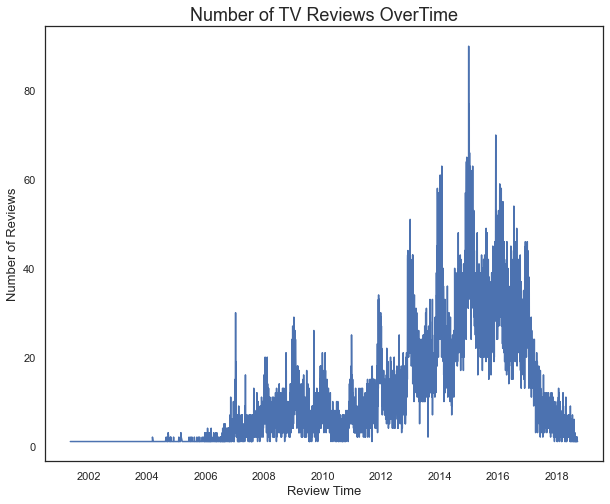

In [242]:
sns.set_theme(style = 'white')
figure(figsize=(10, 8))
sns.lineplot( x = 'reviewTime', y='reviewText', data = date_df)
plt.xlabel('Review Time', fontsize = 13)
plt.ylabel('Number of Reviews', fontsize = 13)
plt.title('Number of TV Reviews OverTime', fontsize = 18)
plt.savefig('Number_of_TV_Reviews_OverTime.svg')

**Positive vs Negative Reviews**

In [98]:
brand_df = df.groupby(['brand','rating']).agg({'reviewText':'count'})

In [99]:
brand_df = brand_df.reset_index()

In [100]:
brand_df = brand_df[(brand_df['brand'] == 'Hisense') | (brand_df['brand'] == 'LG')| (brand_df['brand'] == 'Samsung') | (brand_df['brand'] == 'TCL')]

In [101]:
brand_df

,brand,rating,reviewText
0,Hisense,0,93
1,Hisense,1,477
2,LG,0,1848
3,LG,1,8379
8,Samsung,0,3918
9,Samsung,1,18113
14,TCL,0,792
15,TCL,1,3907


Text(0, 0.5, 'Number of Reviews')

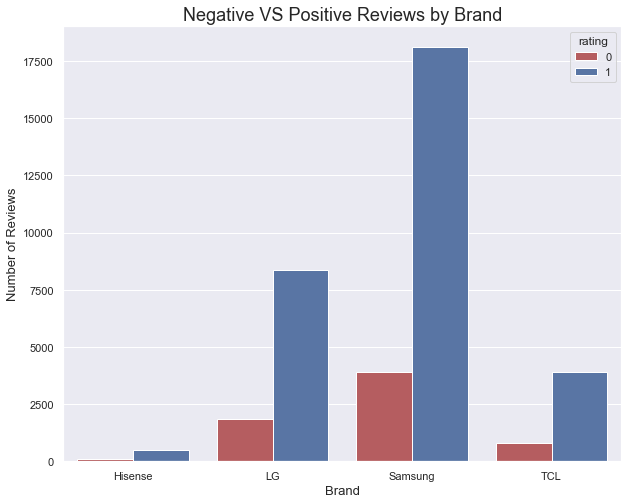

In [116]:
sns.set_style('darkgrid')
figure(figsize=(10, 8))
sns.barplot(x = 'brand', y='reviewText', data=brand_df, hue = 'rating', palette=['r', 'b'])
plt.title("Negative VS Positive Reviews by Brand", fontsize = 18)
plt.xlabel("Brand", fontsize = 13 )
plt.ylabel("Number of Reviews", fontsize = 13)

In [134]:

for d in df1['reviewText'][:5]:
    bow = dictionary.doc2bow(d.split())
    print(lda.get_document_topics(bow, minimum_probability=0))

[(0, 0.012507459), (1, 0.012507459), (2, 0.012507459), (3, 0.76235825), (4, 0.012507459), (5, 0.012507459), (6, 0.012507459), (7, 0.012507459), (8, 0.012507459), (9, 0.01250746), (10, 0.012507459), (11, 0.012507459), (12, 0.012507459), (13, 0.012507459), (14, 0.012507459), (15, 0.012507459), (16, 0.012507459), (17, 0.012507459), (18, 0.012507459), (19, 0.012507459)]
[(0, 0.016667677), (1, 0.016667677), (2, 0.016667677), (3, 0.016667677), (4, 0.016667677), (5, 0.016667677), (6, 0.016667677), (7, 0.016667677), (8, 0.68331414), (9, 0.016667677), (10, 0.016667677), (11, 0.016667677), (12, 0.016667677), (13, 0.016667677), (14, 0.016667677), (15, 0.016667677), (16, 0.016667677), (17, 0.016667677), (18, 0.016667677), (19, 0.016667677)]
[(0, 0.010003332), (1, 0.010003332), (2, 0.010003332), (3, 0.010003332), (4, 0.010003332), (5, 0.010003332), (6, 0.010003332), (7, 0.8099367), (8, 0.010003332), (9, 0.010003332), (10, 0.010003332), (11, 0.010003332), (12, 0.010003332), (13, 0.010003332), (14, 0

In [137]:
lda.get_document_topics(corpus)

In [136]:
empty_df = pd.DataFrame()

In [140]:
empty_df['topics'] = lda.get_document_topics(corpus)

sf = pd.DataFrame(data=empty_df['topics'])
af = pd.DataFrame()

for i in range(20):
    af[str(i)]=[]

frames = [sf,af]
af = pd.concat(frames).fillna(0)

for i in range(791):
    for j in range(len(empty_df['topics'][i])):
        af[str(empty_df['topics'][i][j][0])].loc[i] = empty_df['topics'][i][j][1]

In [143]:
af

,topics,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,"[(3, 0.92075145)]",0.000000,0.0,0.0,0.920751,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000
1,"[(7, 0.8415587)]",0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.841559,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000
2,"[(7, 0.9049489)]",0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.904949,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000
3,"[(0, 0.9471935)]",0.947194,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000
4,"[(0, 0.9603909)]",0.960391,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,"[(13, 0.9603912)]",0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.960391,0.0,0.0,0.0,0.0,0.00000,0.000000
788,"[(19, 0.974991)]",0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.974991
789,"[(19, 0.974991)]",0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.974991
790,"[(18, 0.9702799)]",0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.97028,0.000000


## 4 brand combine total LDA

In [240]:
### filter out the 4 brand from the dataset
inter_df = df[(df['brand'] == 'Hisense') | (df['brand'] == 'LG')| (df['brand'] == 'Samsung') | (df['brand'] == 'TCL')]

In [241]:
corpus = inter_df['reviewText']
count_vectorizer.fit(corpus)
review_word =  count_vectorizer.transform(corpus).transpose()
corpus = matutils.Sparse2Corpus(review_word)
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())
lda = models.LdaModel(corpus=corpus, num_topics=20, id2word=id2word, passes=10)

2021-05-28 00:23:35,098 : INFO : using symmetric alpha at 0.05
2021-05-28 00:23:35,099 : INFO : using symmetric eta at 0.05
2021-05-28 00:23:35,234 : INFO : using serial LDA version on this node
2021-05-28 00:23:37,245 : INFO : running online (multi-pass) LDA training, 20 topics, 10 passes over the supplied corpus of 37527 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2021-05-28 00:23:37,311 : INFO : PROGRESS: pass 0, at document #2000/37527
2021-05-28 00:23:40,520 : INFO : merging changes from 2000 documents into a model of 37527 documents
2021-05-28 00:23:41,688 : INFO : topic #19 (0.050): 0.006*"picture" + 0.005*"set" + 0.004*"screen" + 0.003*"great" + 0.003*"hdmi" + 0.003*"good" + 0.003*"cable" + 0.003*"quality" + 0.003*"like" + 0.003*"lcd"
2021-05-28 00:23:41,700 : INFO : topic #9 (0.050): 0.004*"lcd" + 0.004*"picture" + 0.004*"hd" + 0.004*"quality" + 0.003*"great" + 0.003*"g

2021-05-28 00:24:05,980 : INFO : topic diff=0.285045, rho=0.408248
2021-05-28 00:24:06,043 : INFO : PROGRESS: pass 0, at document #14000/37527
2021-05-28 00:24:08,330 : INFO : merging changes from 2000 documents into a model of 37527 documents
2021-05-28 00:24:09,503 : INFO : topic #18 (0.050): 0.005*"picture" + 0.004*"amazon" + 0.003*"price" + 0.003*"bought" + 0.002*"great" + 0.002*"good" + 0.002*"set" + 0.002*"trumotion" + 0.002*"quality" + 0.002*"got"
2021-05-28 00:24:09,513 : INFO : topic #11 (0.050): 0.002*"love new" + 0.001*"picture" + 0.001*"dorm" + 0.001*"purchased bedroom" + 0.001*"great" + 0.001*"price" + 0.001*"amazon" + 0.001*"bought" + 0.001*"years working" + 0.001*"best"
2021-05-28 00:24:09,526 : INFO : topic #9 (0.050): 0.044*"app" + 0.003*"iphone" + 0.002*"netflix streaming" + 0.001*"ve" + 0.001*"picture" + 0.001*"quality" + 0.001*"good" + 0.001*"amazon prime" + 0.001*"sound" + 0.001*"great"
2021-05-28 00:24:09,538 : INFO : topic #0 (0.050): 0.002*"year later" + 0.001*"

2021-05-28 00:24:30,541 : INFO : topic #1 (0.050): 0.002*"household" + 0.001*"works expected" + 0.001*"indication" + 0.001*"use don" + 0.001*"image good" + 0.001*"wireless connectivity" + 0.001*"far worked" + 0.001*"optical connection" + 0.001*"tvs come" + 0.001*"abilities"
2021-05-28 00:24:30,553 : INFO : topic #9 (0.050): 0.020*"app" + 0.002*"netflix streaming" + 0.001*"iphone" + 0.001*"sound effects" + 0.001*"kids room" + 0.001*"easy wall" + 0.001*"welcome" + 0.001*"price fast" + 0.001*"built netflix" + 0.001*"price way"
2021-05-28 00:24:30,643 : INFO : topic diff=0.067995, rho=0.288675
2021-05-28 00:24:30,693 : INFO : PROGRESS: pass 0, at document #26000/37527
2021-05-28 00:24:32,740 : INFO : merging changes from 2000 documents into a model of 37527 documents
2021-05-28 00:24:34,007 : INFO : topic #12 (0.050): 0.015*"picture" + 0.008*"screen" + 0.008*"like" + 0.007*"quality" + 0.007*"set" + 0.006*"good" + 0.005*"settings" + 0.005*"better" + 0.005*"sound" + 0.005*"great"
2021-05-28 

2021-05-28 00:24:50,215 : INFO : topic #18 (0.050): 0.002*"perfect bedroom" + 0.001*"color good" + 0.001*"intelligent" + 0.001*"makes easier" + 0.001*"remote functions" + 0.001*"washer" + 0.001*"great beautiful" + 0.001*"picture bought" + 0.001*"love far" + 0.001*"broken screen"
2021-05-28 00:24:50,228 : INFO : topic #6 (0.050): 0.001*"fool" + 0.001*"adobe" + 0.001*"reason got" + 0.000*"quality works" + 0.000*"love little" + 0.000*"great condition" + 0.000*"great flat" + 0.000*"price value" + 0.000*"couldn beat" + 0.000*"usb adapter"
2021-05-28 00:24:50,243 : INFO : topic #13 (0.050): 0.006*"os" + 0.005*"perfect" + 0.003*"ive" + 0.002*"set" + 0.002*"guest room" + 0.002*"amazon video" + 0.002*"works perfect" + 0.002*"gift" + 0.001*"picture" + 0.001*"pandora"
2021-05-28 00:24:50,255 : INFO : topic #19 (0.050): 0.001*"wish remote" + 0.001*"bought son" + 0.001*"imac" + 0.001*"impressive picture" + 0.000*"time works" + 0.000*"bedroom easy" + 0.000*"bought upgrade" + 0.000*"view screen" + 0.

2021-05-28 00:25:09,583 : INFO : topic #12 (0.050): 0.013*"picture" + 0.008*"screen" + 0.007*"set" + 0.007*"like" + 0.006*"lcd" + 0.006*"quality" + 0.005*"better" + 0.005*"good" + 0.005*"plasma" + 0.005*"color"
2021-05-28 00:25:09,598 : INFO : topic #9 (0.050): 0.002*"app" + 0.001*"welcome" + 0.001*"system use" + 0.001*"built netflix" + 0.001*"bedroom didn" + 0.001*"happy choice" + 0.001*"kids room" + 0.001*"settings adjusted" + 0.001*"issues great" + 0.001*"sound effects"
2021-05-28 00:25:09,609 : INFO : topic #0 (0.050): 0.001*"year later" + 0.001*"said great" + 0.001*"size living" + 0.001*"purchase definitely" + 0.000*"reviews little" + 0.000*"dents" + 0.000*"agree reviews" + 0.000*"seen television" + 0.000*"ago problems" + 0.000*"scratches dents"
2021-05-28 00:25:09,698 : INFO : topic diff=0.016300, rho=0.219457
2021-05-28 00:25:09,778 : INFO : PROGRESS: pass 1, at document #10000/37527
2021-05-28 00:25:11,965 : INFO : merging changes from 2000 documents into a model of 37527 docum

2021-05-28 00:25:29,667 : INFO : PROGRESS: pass 1, at document #20000/37527
2021-05-28 00:25:31,716 : INFO : merging changes from 2000 documents into a model of 37527 documents
2021-05-28 00:25:33,140 : INFO : topic #9 (0.050): 0.001*"sound effects" + 0.001*"kids room" + 0.001*"welcome" + 0.001*"system use" + 0.001*"built netflix" + 0.001*"easy wall" + 0.001*"price fast" + 0.001*"issues great" + 0.001*"bedroom didn" + 0.001*"tone warm"
2021-05-28 00:25:33,159 : INFO : topic #16 (0.050): 0.004*"vesa" + 0.002*"kitchen counter" + 0.001*"small speakers" + 0.001*"mounting holes" + 0.001*"counter" + 0.001*"stand little" + 0.001*"student" + 0.001*"hardest" + 0.001*"vesa mounting" + 0.001*"quit working"
2021-05-28 00:25:33,181 : INFO : topic #2 (0.050): 0.003*"excelente" + 0.002*"threw" + 0.002*"es" + 0.001*"de" + 0.001*"el" + 0.001*"fits bill" + 0.001*"lo" + 0.001*"en" + 0.001*"tvs like" + 0.001*"la"
2021-05-28 00:25:33,205 : INFO : topic #17 (0.050): 0.001*"curious" + 0.001*"wasn expecting" 

2021-05-28 00:25:49,726 : INFO : topic #1 (0.050): 0.001*"household" + 0.001*"works expected" + 0.001*"image good" + 0.001*"use don" + 0.001*"explored" + 0.001*"abilities" + 0.001*"wireless connectivity" + 0.001*"indication" + 0.001*"built media" + 0.001*"tin"
2021-05-28 00:25:49,815 : INFO : topic diff=0.014572, rho=0.219457
2021-05-28 00:25:49,854 : INFO : PROGRESS: pass 1, at document #32000/37527
2021-05-28 00:25:51,510 : INFO : merging changes from 2000 documents into a model of 37527 documents
2021-05-28 00:25:52,674 : INFO : topic #18 (0.050): 0.002*"perfect bedroom" + 0.001*"color good" + 0.001*"picture bought" + 0.001*"great beautiful" + 0.001*"bought second" + 0.001*"remote functions" + 0.001*"broken screen" + 0.001*"love far" + 0.001*"makes easier" + 0.001*"auxiliary"
2021-05-28 00:25:52,686 : INFO : topic #14 (0.050): 0.003*"watching netflix" + 0.002*"youtube videos" + 0.001*"hdd" + 0.001*"original remote" + 0.001*"nice product" + 0.001*"setup picture" + 0.001*"years warran

2021-05-28 00:26:11,567 : INFO : topic #17 (0.050): 0.001*"wasn expecting" + 0.001*"curious" + 0.001*"major problem" + 0.001*"worked perfect" + 0.001*"screen started" + 0.001*"won buy" + 0.001*"excellent good" + 0.001*"quality issue" + 0.001*"expected set" + 0.001*"ignored"
2021-05-28 00:26:11,579 : INFO : topic #16 (0.050): 0.004*"vesa" + 0.001*"mounting holes" + 0.001*"sound terrible" + 0.001*"small speakers" + 0.001*"vesa mounting" + 0.001*"exactly expected" + 0.001*"good basic" + 0.001*"student" + 0.001*"thought great" + 0.001*"installation easy"
2021-05-28 00:26:11,588 : INFO : topic #19 (0.050): 0.001*"wmv" + 0.001*"wish remote" + 0.001*"impressive picture" + 0.001*"time works" + 0.001*"works best" + 0.001*"bought son" + 0.001*"imac" + 0.001*"year works" + 0.000*"elected" + 0.000*"mpg"
2021-05-28 00:26:11,598 : INFO : topic #13 (0.050): 0.003*"ive" + 0.002*"perfect" + 0.001*"os" + 0.001*"guest room" + 0.001*"works perfect" + 0.001*"mart" + 0.001*"wal" + 0.001*"firing speakers" + 

2021-05-28 00:26:28,232 : INFO : topic #4 (0.050): 0.031*"wifi" + 0.008*"dlna" + 0.004*"led tvs" + 0.004*"active glasses" + 0.003*"dongle" + 0.003*"chromecast" + 0.003*"built wifi" + 0.003*"roku box" + 0.002*"iphone" + 0.002*"amazon prime"
2021-05-28 00:26:28,344 : INFO : topic diff=0.004707, rho=0.214356
2021-05-28 00:26:28,423 : INFO : PROGRESS: pass 2, at document #16000/37527
2021-05-28 00:26:30,236 : INFO : merging changes from 2000 documents into a model of 37527 documents
2021-05-28 00:26:31,565 : INFO : topic #1 (0.050): 0.001*"household" + 0.001*"abilities" + 0.001*"luminance" + 0.001*"use don" + 0.001*"works expected" + 0.001*"tvs come" + 0.001*"indication" + 0.001*"sounded like" + 0.001*"tin" + 0.001*"ranges"
2021-05-28 00:26:31,578 : INFO : topic #6 (0.050): 0.001*"fool" + 0.001*"adobe" + 0.001*"shipped fast" + 0.001*"great condition" + 0.001*"quality actually" + 0.001*"great flat" + 0.001*"love little" + 0.001*"reason got" + 0.001*"usb adapter" + 0.001*"bought kitchen"
202

2021-05-28 00:26:50,330 : INFO : topic #13 (0.050): 0.003*"ive" + 0.002*"guest room" + 0.001*"works perfect" + 0.001*"shuts" + 0.001*"bought black" + 0.001*"interfaces" + 0.001*"arms" + 0.001*"inky" + 0.001*"ve year" + 0.001*"os"
2021-05-28 00:26:50,341 : INFO : topic #10 (0.050): 0.015*"great" + 0.013*"picture" + 0.010*"good" + 0.009*"sound" + 0.009*"remote" + 0.008*"use" + 0.008*"smart" + 0.006*"quality" + 0.006*"price" + 0.006*"set"
2021-05-28 00:26:50,355 : INFO : topic #4 (0.050): 0.030*"wifi" + 0.008*"chromecast" + 0.005*"dlna" + 0.004*"led tvs" + 0.003*"roku box" + 0.003*"active glasses" + 0.002*"dongle" + 0.002*"platform" + 0.002*"motion control" + 0.002*"iphone"
2021-05-28 00:26:50,369 : INFO : topic #7 (0.050): 0.012*"service" + 0.009*"amazon" + 0.008*"problem" + 0.008*"customer" + 0.008*"warranty" + 0.007*"called" + 0.007*"support" + 0.005*"delivery" + 0.005*"issue" + 0.005*"customer service"
2021-05-28 00:26:50,458 : INFO : topic diff=0.008391, rho=0.214356
2021-05-28 00:26

2021-05-28 00:27:05,869 : INFO : topic diff=0.006799, rho=0.214356
2021-05-28 00:27:08,375 : INFO : -18.331 per-word bound, 329847.2 perplexity estimate based on a held-out corpus of 1527 documents with 73863 words
2021-05-28 00:27:08,376 : INFO : PROGRESS: pass 2, at document #37527/37527
2021-05-28 00:27:09,844 : INFO : merging changes from 1527 documents into a model of 37527 documents
2021-05-28 00:27:11,036 : INFO : topic #9 (0.050): 0.001*"welcome" + 0.001*"built netflix" + 0.001*"kids room" + 0.001*"issues great" + 0.001*"sound effects" + 0.001*"system use" + 0.001*"happy choice" + 0.001*"bedroom didn" + 0.001*"easy wall" + 0.000*"year mark"
2021-05-28 00:27:11,047 : INFO : topic #7 (0.050): 0.011*"service" + 0.011*"warranty" + 0.008*"problem" + 0.008*"customer" + 0.007*"amazon" + 0.007*"support" + 0.006*"years" + 0.006*"called" + 0.006*"months" + 0.005*"customer service"
2021-05-28 00:27:11,058 : INFO : topic #18 (0.050): 0.001*"perfect bedroom" + 0.001*"color good" + 0.001*"in

2021-05-28 00:27:28,364 : INFO : topic #15 (0.050): 0.001*"easy assemble" + 0.001*"linkstick" + 0.001*"excelent" + 0.001*"sound best" + 0.001*"wireless lan" + 0.001*"lan adapter" + 0.001*"chroma" + 0.001*"quality exceptional" + 0.001*"find amazon" + 0.001*"lot heat"
2021-05-28 00:27:28,376 : INFO : topic #16 (0.050): 0.004*"vesa" + 0.001*"small speakers" + 0.001*"sound terrible" + 0.001*"mounting holes" + 0.001*"installation easy" + 0.001*"good basic" + 0.001*"exactly expected" + 0.001*"thought great" + 0.001*"stand little" + 0.001*"wired network"
2021-05-28 00:27:28,390 : INFO : topic #9 (0.050): 0.001*"welcome" + 0.001*"system use" + 0.001*"built netflix" + 0.001*"bedroom didn" + 0.001*"issues great" + 0.001*"sound effects" + 0.001*"kids room" + 0.001*"settings adjusted" + 0.001*"happy choice" + 0.001*"negligible"
2021-05-28 00:27:28,490 : INFO : topic diff=0.004379, rho=0.209595
2021-05-28 00:27:28,567 : INFO : PROGRESS: pass 3, at document #12000/37527
2021-05-28 00:27:30,407 : INF

2021-05-28 00:27:48,221 : INFO : topic #17 (0.050): 0.001*"curious" + 0.001*"wasn expecting" + 0.001*"ignored" + 0.001*"worked perfect" + 0.001*"won buy" + 0.001*"major problem" + 0.001*"buying brand" + 0.001*"retired" + 0.001*"sound happy" + 0.001*"excellent good"
2021-05-28 00:27:48,311 : INFO : topic diff=0.018003, rho=0.209595
2021-05-28 00:27:48,377 : INFO : PROGRESS: pass 3, at document #22000/37527
2021-05-28 00:27:50,504 : INFO : merging changes from 2000 documents into a model of 37527 documents
2021-05-28 00:27:51,799 : INFO : topic #14 (0.050): 0.002*"youtube videos" + 0.002*"original remote" + 0.002*"watching netflix" + 0.002*"hdd" + 0.001*"looking like" + 0.001*"time update" + 0.001*"setup picture" + 0.001*"stops working" + 0.001*"alternatives" + 0.001*"like television"
2021-05-28 00:27:51,809 : INFO : topic #9 (0.050): 0.001*"sound effects" + 0.001*"kids room" + 0.001*"welcome" + 0.001*"built netflix" + 0.001*"system use" + 0.001*"price fast" + 0.001*"easy wall" + 0.001*"

2021-05-28 00:28:07,703 : INFO : topic #19 (0.050): 0.001*"wish remote" + 0.001*"bought son" + 0.001*"bedroom easy" + 0.001*"imac" + 0.001*"time works" + 0.000*"impressive picture" + 0.000*"price year" + 0.000*"works best" + 0.000*"wife happy" + 0.000*"year works"
2021-05-28 00:28:07,715 : INFO : topic #2 (0.050): 0.001*"threw" + 0.001*"excelente" + 0.001*"fits bill" + 0.001*"price pleased" + 0.001*"videos usb" + 0.001*"super sharp" + 0.000*"el" + 0.000*"tvs like" + 0.000*"es" + 0.000*"clear great"
2021-05-28 00:28:07,728 : INFO : topic #3 (0.050): 0.002*"easy install" + 0.002*"simple use" + 0.001*"cut cable" + 0.001*"awesome price" + 0.001*"trailer" + 0.001*"graphics card" + 0.001*"volume buttons" + 0.001*"excellent great" + 0.001*"great small" + 0.001*"lame"
2021-05-28 00:28:07,740 : INFO : topic #4 (0.050): 0.031*"wifi" + 0.008*"chromecast" + 0.004*"dlna" + 0.003*"roku box" + 0.003*"led tvs" + 0.002*"love great" + 0.002*"dongle" + 0.002*"platform" + 0.002*"built wifi" + 0.002*"activ

2021-05-28 00:28:26,645 : INFO : topic #5 (0.050): 0.001*"issues far" + 0.001*"little years" + 0.001*"correct problem" + 0.001*"perfect replacement" + 0.001*"believe good" + 0.001*"definitely purchase" + 0.001*"owned picture" + 0.001*"problem corrected" + 0.000*"absolutely loves" + 0.000*"lasted little"
2021-05-28 00:28:26,740 : INFO : topic diff=0.028030, rho=0.205137
2021-05-28 00:28:26,870 : INFO : PROGRESS: pass 4, at document #6000/37527
2021-05-28 00:28:29,092 : INFO : merging changes from 2000 documents into a model of 37527 documents
2021-05-28 00:28:30,269 : INFO : topic #8 (0.050): 0.024*"link" + 0.013*"ref" + 0.013*"linked" + 0.013*"nbsp" + 0.013*"ref ie" + 0.013*"ie" + 0.013*"dp" + 0.012*"dp ref" + 0.012*"product link" + 0.012*"linked class"
2021-05-28 00:28:30,279 : INFO : topic #15 (0.050): 0.001*"excelent" + 0.001*"chroma" + 0.001*"easy assemble" + 0.001*"sound best" + 0.001*"wireless lan" + 0.001*"linkstick" + 0.001*"quality exceptional" + 0.001*"pros nice" + 0.001*"hdm

2021-05-28 00:28:46,383 : INFO : topic #18 (0.050): 0.001*"perfect bedroom" + 0.001*"intelligent" + 0.001*"color good" + 0.001*"juddering" + 0.001*"picture bought" + 0.001*"remote functions" + 0.001*"bought second" + 0.001*"months far" + 0.001*"packaging great" + 0.001*"little hard"
2021-05-28 00:28:46,395 : INFO : topic #8 (0.050): 0.027*"link" + 0.017*"nbsp" + 0.014*"data" + 0.014*"linked" + 0.014*"ref" + 0.014*"dp" + 0.014*"dp ref" + 0.014*"ref ie" + 0.013*"ie" + 0.013*"class"
2021-05-28 00:28:46,407 : INFO : topic #0 (0.050): 0.002*"year later" + 0.001*"size living" + 0.001*"said great" + 0.001*"purchase definitely" + 0.000*"agree reviews" + 0.000*"great fits" + 0.000*"seen television" + 0.000*"reviews little" + 0.000*"ago problems" + 0.000*"perfect way"
2021-05-28 00:28:46,418 : INFO : topic #7 (0.050): 0.015*"service" + 0.012*"amazon" + 0.010*"warranty" + 0.010*"problem" + 0.009*"customer" + 0.008*"called" + 0.008*"delivery" + 0.006*"repair" + 0.006*"new" + 0.006*"months"
2021-05

2021-05-28 00:29:06,808 : INFO : topic #1 (0.050): 0.002*"household" + 0.001*"works expected" + 0.001*"use don" + 0.001*"indication" + 0.001*"abilities" + 0.001*"image good" + 0.001*"far worked" + 0.001*"wireless connectivity" + 0.001*"tin" + 0.001*"luminance"
2021-05-28 00:29:06,907 : INFO : topic diff=0.008031, rho=0.205137
2021-05-28 00:29:06,956 : INFO : PROGRESS: pass 4, at document #28000/37527
2021-05-28 00:29:08,553 : INFO : merging changes from 2000 documents into a model of 37527 documents
2021-05-28 00:29:09,780 : INFO : topic #15 (0.050): 0.003*"chroma" + 0.001*"easy assemble" + 0.001*"excelent" + 0.001*"sound best" + 0.001*"find amazon" + 0.000*"quality exceptional" + 0.000*"hdmi hook" + 0.000*"awesome ve" + 0.000*"trouble setting" + 0.000*"leave review"
2021-05-28 00:29:09,792 : INFO : topic #4 (0.050): 0.024*"wifi" + 0.008*"chromecast" + 0.004*"dlna" + 0.004*"led tvs" + 0.003*"roku box" + 0.003*"active glasses" + 0.002*"love great" + 0.002*"built wifi" + 0.002*"dongle" +

2021-05-28 00:29:28,173 : INFO : topic #16 (0.050): 0.004*"vesa" + 0.001*"mounting holes" + 0.001*"sound terrible" + 0.001*"exactly expected" + 0.001*"good basic" + 0.001*"vesa mounting" + 0.001*"thought great" + 0.001*"love perfect" + 0.001*"hardest" + 0.001*"quit working"
2021-05-28 00:29:28,188 : INFO : topic #10 (0.050): 0.018*"great" + 0.015*"picture" + 0.011*"good" + 0.010*"sound" + 0.009*"remote" + 0.008*"use" + 0.007*"price" + 0.007*"quality" + 0.007*"smart" + 0.006*"set"
2021-05-28 00:29:28,198 : INFO : topic #14 (0.050): 0.002*"watching netflix" + 0.002*"original remote" + 0.002*"youtube videos" + 0.001*"looking like" + 0.001*"service said" + 0.001*"cost fix" + 0.001*"vertical banding" + 0.001*"hdd" + 0.001*"alternatives" + 0.001*"stops working"
2021-05-28 00:29:28,208 : INFO : topic #7 (0.050): 0.012*"service" + 0.011*"warranty" + 0.009*"amazon" + 0.009*"problem" + 0.008*"customer" + 0.007*"support" + 0.006*"years" + 0.006*"called" + 0.006*"months" + 0.006*"new"
2021-05-28 0

2021-05-28 00:29:47,088 : INFO : topic #5 (0.050): 0.001*"issues far" + 0.001*"owned picture" + 0.001*"correct problem" + 0.001*"similar model" + 0.001*"definitely purchase" + 0.001*"speakers best" + 0.001*"little years" + 0.001*"believe good" + 0.001*"picture acceptable" + 0.001*"dose"
2021-05-28 00:29:47,101 : INFO : topic #3 (0.050): 0.002*"simple use" + 0.002*"lame" + 0.002*"mode standard" + 0.001*"borders" + 0.001*"dlp hdtv" + 0.001*"awesome price" + 0.001*"led backlighting" + 0.001*"pc mode" + 0.001*"best tvs" + 0.001*"need remote"
2021-05-28 00:29:47,211 : INFO : topic diff=0.004730, rho=0.200953
2021-05-28 00:29:47,287 : INFO : PROGRESS: pass 5, at document #12000/37527
2021-05-28 00:29:49,217 : INFO : merging changes from 2000 documents into a model of 37527 documents
2021-05-28 00:29:50,440 : INFO : topic #5 (0.050): 0.001*"issues far" + 0.001*"little years" + 0.001*"definitely purchase" + 0.001*"owned picture" + 0.001*"correct problem" + 0.001*"similar model" + 0.001*"dose" 

2021-05-28 00:30:06,739 : INFO : PROGRESS: pass 5, at document #22000/37527
2021-05-28 00:30:08,536 : INFO : merging changes from 2000 documents into a model of 37527 documents
2021-05-28 00:30:09,790 : INFO : topic #6 (0.050): 0.001*"adobe" + 0.001*"fool" + 0.001*"love little" + 0.001*"et" + 0.001*"great condition" + 0.001*"good item" + 0.001*"bought kitchen" + 0.001*"quality actually" + 0.000*"reason got" + 0.000*"great flat"
2021-05-28 00:30:09,802 : INFO : topic #12 (0.050): 0.010*"screen" + 0.010*"picture" + 0.007*"like" + 0.007*"set" + 0.006*"settings" + 0.006*"plasma" + 0.005*"led" + 0.005*"color" + 0.005*"better" + 0.005*"look"
2021-05-28 00:30:09,812 : INFO : topic #9 (0.050): 0.001*"sound effects" + 0.001*"kids room" + 0.001*"welcome" + 0.001*"built netflix" + 0.001*"system use" + 0.001*"price fast" + 0.001*"issues great" + 0.001*"easy wall" + 0.001*"bedroom didn" + 0.001*"lackluster"
2021-05-28 00:30:09,824 : INFO : topic #15 (0.050): 0.001*"easy assemble" + 0.001*"excelent"

2021-05-28 00:30:26,697 : INFO : topic #17 (0.050): 0.001*"wasn expecting" + 0.001*"curious" + 0.001*"buying brand" + 0.001*"sound price" + 0.001*"ignored" + 0.001*"major problem" + 0.001*"won buy" + 0.001*"television perfect" + 0.001*"retired" + 0.000*"buy future"
2021-05-28 00:30:26,718 : INFO : topic #7 (0.050): 0.012*"service" + 0.011*"amazon" + 0.008*"customer" + 0.008*"warranty" + 0.008*"problem" + 0.007*"support" + 0.006*"called" + 0.006*"delivery" + 0.005*"new" + 0.005*"wifi"
2021-05-28 00:30:26,731 : INFO : topic #18 (0.050): 0.002*"perfect bedroom" + 0.001*"color good" + 0.001*"picture bought" + 0.001*"great beautiful" + 0.001*"remote functions" + 0.001*"bought second" + 0.001*"broken screen" + 0.001*"love far" + 0.001*"makes easier" + 0.001*"auxiliary"
2021-05-28 00:30:26,897 : INFO : topic diff=0.013866, rho=0.200953
2021-05-28 00:30:26,991 : INFO : PROGRESS: pass 5, at document #34000/37527
2021-05-28 00:30:29,750 : INFO : merging changes from 2000 documents into a model o

2021-05-28 00:30:46,940 : INFO : topic #1 (0.050): 0.002*"luminance" + 0.001*"household" + 0.001*"abilities" + 0.001*"works expected" + 0.001*"indication" + 0.001*"use don" + 0.001*"sounded like" + 0.001*"tin" + 0.001*"image good" + 0.001*"pos"
2021-05-28 00:30:47,028 : INFO : topic diff=0.027911, rho=0.197014
2021-05-28 00:30:47,119 : INFO : PROGRESS: pass 6, at document #6000/37527
2021-05-28 00:30:49,035 : INFO : merging changes from 2000 documents into a model of 37527 documents
2021-05-28 00:30:50,222 : INFO : topic #2 (0.050): 0.002*"de" + 0.002*"excelente" + 0.001*"threw" + 0.001*"es" + 0.001*"que" + 0.001*"en" + 0.001*"el" + 0.001*"super sharp" + 0.001*"tvs like" + 0.001*"la"
2021-05-28 00:30:50,233 : INFO : topic #8 (0.050): 0.024*"link" + 0.013*"ref" + 0.013*"linked" + 0.013*"nbsp" + 0.013*"ref ie" + 0.013*"ie" + 0.012*"dp" + 0.012*"dp ref" + 0.012*"product link" + 0.012*"linked class"
2021-05-28 00:30:50,242 : INFO : topic #18 (0.050): 0.002*"perfect bedroom" + 0.001*"intell

2021-05-28 00:31:05,723 : INFO : topic #2 (0.050): 0.003*"excelente" + 0.002*"es" + 0.002*"threw" + 0.002*"de" + 0.002*"el" + 0.001*"lo" + 0.001*"en" + 0.001*"la" + 0.001*"tvs like" + 0.001*"que"
2021-05-28 00:31:05,733 : INFO : topic #16 (0.050): 0.004*"vesa" + 0.001*"small speakers" + 0.001*"hardest" + 0.001*"stand little" + 0.001*"kitchen counter" + 0.001*"sound terrible" + 0.001*"mounting holes" + 0.001*"student" + 0.001*"quit working" + 0.001*"thought great"
2021-05-28 00:31:05,741 : INFO : topic #9 (0.050): 0.001*"welcome" + 0.001*"sound effects" + 0.001*"system use" + 0.001*"built netflix" + 0.001*"bedroom didn" + 0.001*"kids room" + 0.001*"happy choice" + 0.001*"issues great" + 0.001*"price fast" + 0.001*"negligible"
2021-05-28 00:31:05,830 : INFO : topic diff=0.003427, rho=0.197014
2021-05-28 00:31:05,890 : INFO : PROGRESS: pass 6, at document #18000/37527
2021-05-28 00:31:07,501 : INFO : merging changes from 2000 documents into a model of 37527 documents
2021-05-28 00:31:08,6

2021-05-28 00:31:23,327 : INFO : topic diff=0.007983, rho=0.197014
2021-05-28 00:31:23,377 : INFO : PROGRESS: pass 6, at document #28000/37527
2021-05-28 00:31:24,922 : INFO : merging changes from 2000 documents into a model of 37527 documents
2021-05-28 00:31:26,073 : INFO : topic #9 (0.050): 0.001*"welcome" + 0.001*"issues great" + 0.001*"kids room" + 0.001*"easy wall" + 0.001*"price fast" + 0.001*"built netflix" + 0.001*"sound effects" + 0.001*"system use" + 0.001*"lackluster" + 0.000*"settings adjusted"
2021-05-28 00:31:26,082 : INFO : topic #6 (0.050): 0.001*"fool" + 0.001*"adobe" + 0.001*"love little" + 0.001*"great condition" + 0.001*"bought kitchen" + 0.001*"et" + 0.001*"shipped fast" + 0.000*"quality actually" + 0.000*"good item" + 0.000*"reason got"
2021-05-28 00:31:26,091 : INFO : topic #17 (0.050): 0.001*"curious" + 0.001*"wasn expecting" + 0.001*"sound price" + 0.001*"ignored" + 0.001*"major problem" + 0.001*"won buy" + 0.001*"excellent good" + 0.001*"retired" + 0.001*"sou

2021-05-28 00:31:42,726 : INFO : topic #11 (0.050): 0.002*"love new" + 0.001*"dorm" + 0.001*"dorm room" + 0.001*"amazing colors" + 0.001*"purchased bedroom" + 0.001*"champ" + 0.001*"problems great" + 0.001*"like champ" + 0.000*"built audio" + 0.000*"problem connecting"
2021-05-28 00:31:42,735 : INFO : topic #9 (0.050): 0.001*"welcome" + 0.001*"built netflix" + 0.001*"kids room" + 0.001*"issues great" + 0.001*"sound effects" + 0.001*"system use" + 0.001*"happy choice" + 0.001*"bedroom didn" + 0.001*"easy wall" + 0.000*"love features"
2021-05-28 00:31:42,744 : INFO : topic #17 (0.050): 0.001*"wasn expecting" + 0.001*"curious" + 0.001*"sound price" + 0.001*"screen started" + 0.001*"major problem" + 0.001*"retired" + 0.001*"worked perfect" + 0.001*"ignored" + 0.000*"won buy" + 0.000*"quality issue"
2021-05-28 00:31:42,752 : INFO : topic #19 (0.050): 0.001*"wish remote" + 0.001*"impressive picture" + 0.001*"year works" + 0.001*"time works" + 0.001*"bought son" + 0.001*"imac" + 0.000*"works 

2021-05-28 00:31:58,632 : INFO : topic #9 (0.050): 0.001*"welcome" + 0.001*"system use" + 0.001*"built netflix" + 0.001*"issues great" + 0.001*"bedroom didn" + 0.001*"kids room" + 0.001*"sound effects" + 0.001*"settings adjusted" + 0.001*"happy choice" + 0.001*"negligible"
2021-05-28 00:31:58,720 : INFO : topic diff=0.004638, rho=0.193299
2021-05-28 00:31:58,787 : INFO : PROGRESS: pass 7, at document #12000/37527
2021-05-28 00:32:00,440 : INFO : merging changes from 2000 documents into a model of 37527 documents
2021-05-28 00:32:01,582 : INFO : topic #4 (0.050): 0.019*"wifi" + 0.009*"dlna" + 0.004*"led tvs" + 0.003*"chromecast" + 0.003*"active glasses" + 0.003*"built wifi" + 0.002*"dongle" + 0.002*"roku box" + 0.002*"love great" + 0.002*"input type"
2021-05-28 00:32:01,591 : INFO : topic #16 (0.050): 0.004*"vesa" + 0.001*"small speakers" + 0.001*"sound terrible" + 0.001*"thought great" + 0.001*"exactly expected" + 0.001*"mounting holes" + 0.001*"student" + 0.001*"good basic" + 0.001*"h

2021-05-28 00:32:18,190 : INFO : merging changes from 2000 documents into a model of 37527 documents
2021-05-28 00:32:19,328 : INFO : topic #0 (0.050): 0.001*"year later" + 0.001*"size living" + 0.001*"purchase definitely" + 0.001*"said great" + 0.000*"perfect way" + 0.000*"seen television" + 0.000*"ago problems" + 0.000*"agree reviews" + 0.000*"reviews little" + 0.000*"great fits"
2021-05-28 00:32:19,340 : INFO : topic #4 (0.050): 0.018*"wifi" + 0.007*"dlna" + 0.007*"chromecast" + 0.004*"led tvs" + 0.003*"active glasses" + 0.002*"motion control" + 0.002*"roku box" + 0.002*"built wifi" + 0.002*"love great" + 0.002*"dongle"
2021-05-28 00:32:19,350 : INFO : topic #2 (0.050): 0.003*"excelente" + 0.002*"threw" + 0.001*"es" + 0.001*"de" + 0.001*"el" + 0.001*"tvs like" + 0.001*"en" + 0.001*"fits bill" + 0.001*"lo" + 0.001*"absolutely gorgeous"
2021-05-28 00:32:19,359 : INFO : topic #10 (0.050): 0.015*"great" + 0.014*"picture" + 0.010*"good" + 0.010*"sound" + 0.009*"remote" + 0.008*"use" + 0.

2021-05-28 00:32:33,802 : INFO : topic #18 (0.050): 0.002*"perfect bedroom" + 0.001*"color good" + 0.001*"picture bought" + 0.001*"great beautiful" + 0.001*"remote functions" + 0.001*"bought second" + 0.001*"love far" + 0.001*"broken screen" + 0.001*"makes easier" + 0.001*"auxiliary"
2021-05-28 00:32:33,812 : INFO : topic #11 (0.050): 0.003*"love new" + 0.002*"dorm" + 0.001*"dorm room" + 0.001*"purchased bedroom" + 0.001*"problems great" + 0.001*"champ" + 0.001*"like champ" + 0.000*"problem connecting" + 0.000*"amazing colors" + 0.000*"built audio"
2021-05-28 00:32:33,900 : INFO : topic diff=0.013821, rho=0.193299
2021-05-28 00:32:33,961 : INFO : PROGRESS: pass 7, at document #34000/37527
2021-05-28 00:32:35,623 : INFO : merging changes from 2000 documents into a model of 37527 documents
2021-05-28 00:32:36,778 : INFO : topic #5 (0.050): 0.001*"issues far" + 0.001*"owned picture" + 0.001*"perfect replacement" + 0.001*"absolutely loves" + 0.001*"dose" + 0.000*"like products" + 0.000*"be

2021-05-28 00:32:51,488 : INFO : PROGRESS: pass 8, at document #6000/37527
2021-05-28 00:32:53,325 : INFO : merging changes from 2000 documents into a model of 37527 documents
2021-05-28 00:32:54,475 : INFO : topic #13 (0.050): 0.004*"ive" + 0.002*"works perfect" + 0.001*"inky" + 0.001*"guest room" + 0.001*"bedroom perfect" + 0.001*"love television" + 0.001*"shuts" + 0.001*"christmas gift" + 0.001*"wal" + 0.001*"interfaces"
2021-05-28 00:32:54,485 : INFO : topic #17 (0.050): 0.001*"wasn expecting" + 0.001*"curious" + 0.001*"major problem" + 0.001*"won buy" + 0.001*"worked perfect" + 0.001*"screen started" + 0.001*"excellent good" + 0.001*"ignored" + 0.001*"lcd replaced" + 0.001*"expected set"
2021-05-28 00:32:54,496 : INFO : topic #11 (0.050): 0.002*"love new" + 0.001*"dorm" + 0.001*"amazing colors" + 0.001*"purchased bedroom" + 0.001*"champ" + 0.001*"like champ" + 0.001*"dorm room" + 0.001*"years working" + 0.001*"problems great" + 0.001*"love plasma"
2021-05-28 00:32:54,507 : INFO : 

2021-05-28 00:33:09,843 : INFO : topic #19 (0.050): 0.001*"wmv" + 0.001*"impressive picture" + 0.001*"imac" + 0.001*"wish remote" + 0.001*"mpg" + 0.001*"works best" + 0.001*"bought son" + 0.000*"price year" + 0.000*"picture saw" + 0.000*"pretty hard"
2021-05-28 00:33:09,852 : INFO : topic #9 (0.050): 0.001*"welcome" + 0.001*"sound effects" + 0.001*"system use" + 0.001*"built netflix" + 0.001*"bedroom didn" + 0.001*"kids room" + 0.001*"happy choice" + 0.001*"issues great" + 0.001*"price fast" + 0.001*"negligible"
2021-05-28 00:33:09,862 : INFO : topic #18 (0.050): 0.001*"perfect bedroom" + 0.001*"intelligent" + 0.001*"color good" + 0.001*"juddering" + 0.001*"picture bought" + 0.001*"remote functions" + 0.001*"bought second" + 0.001*"months far" + 0.001*"packaging great" + 0.001*"little hard"
2021-05-28 00:33:09,950 : INFO : topic diff=0.003093, rho=0.189785
2021-05-28 00:33:10,012 : INFO : PROGRESS: pass 8, at document #18000/37527
2021-05-28 00:33:11,617 : INFO : merging changes from 2

2021-05-28 00:33:27,459 : INFO : topic #6 (0.050): 0.001*"adobe" + 0.001*"fool" + 0.001*"love little" + 0.001*"great condition" + 0.001*"bought kitchen" + 0.001*"et" + 0.000*"quality actually" + 0.000*"good item" + 0.000*"picture watch" + 0.000*"quality works"
2021-05-28 00:33:27,547 : INFO : topic diff=0.007324, rho=0.189785
2021-05-28 00:33:27,600 : INFO : PROGRESS: pass 8, at document #28000/37527
2021-05-28 00:33:29,159 : INFO : merging changes from 2000 documents into a model of 37527 documents
2021-05-28 00:33:30,299 : INFO : topic #14 (0.050): 0.002*"watching netflix" + 0.002*"youtube videos" + 0.002*"original remote" + 0.001*"hdd" + 0.001*"setup picture" + 0.001*"looking like" + 0.001*"nice product" + 0.001*"alternatives" + 0.001*"time update" + 0.001*"service said"
2021-05-28 00:33:30,311 : INFO : topic #10 (0.050): 0.016*"great" + 0.014*"picture" + 0.011*"good" + 0.010*"sound" + 0.009*"remote" + 0.008*"use" + 0.007*"smart" + 0.007*"quality" + 0.006*"set" + 0.006*"price"
2021-

2021-05-28 00:33:44,490 : INFO : PROGRESS: pass 8, at document #37527/37527
2021-05-28 00:33:45,868 : INFO : merging changes from 1527 documents into a model of 37527 documents
2021-05-28 00:33:47,006 : INFO : topic #18 (0.050): 0.002*"perfect bedroom" + 0.001*"color good" + 0.001*"intelligent" + 0.001*"love far" + 0.001*"washer" + 0.001*"makes easier" + 0.001*"picture bought" + 0.001*"remote functions" + 0.001*"bought mother" + 0.001*"bought second"
2021-05-28 00:33:47,019 : INFO : topic #7 (0.050): 0.012*"service" + 0.010*"amazon" + 0.010*"warranty" + 0.008*"problem" + 0.008*"customer" + 0.007*"support" + 0.006*"called" + 0.006*"years" + 0.006*"new" + 0.006*"months"
2021-05-28 00:33:47,029 : INFO : topic #15 (0.050): 0.002*"chroma" + 0.001*"excelent" + 0.001*"easy assemble" + 0.001*"sound best" + 0.000*"quality exceptional" + 0.000*"price new" + 0.000*"find amazon" + 0.000*"fine price" + 0.000*"leave review" + 0.000*"pros nice"
2021-05-28 00:33:47,038 : INFO : topic #2 (0.050): 0.002

2021-05-28 00:34:03,188 : INFO : topic #5 (0.050): 0.001*"issues far" + 0.001*"owned picture" + 0.001*"correct problem" + 0.001*"similar model" + 0.001*"definitely purchase" + 0.001*"speakers best" + 0.001*"little years" + 0.001*"believe good" + 0.001*"picture acceptable" + 0.001*"dose"
2021-05-28 00:34:03,198 : INFO : topic #15 (0.050): 0.001*"easy assemble" + 0.001*"linkstick" + 0.001*"excelent" + 0.001*"sound best" + 0.001*"wireless lan" + 0.001*"chroma" + 0.001*"lan adapter" + 0.001*"quality exceptional" + 0.001*"find amazon" + 0.001*"lot heat"
2021-05-28 00:34:03,209 : INFO : topic #11 (0.050): 0.002*"love new" + 0.001*"dorm" + 0.001*"dorm room" + 0.001*"purchased bedroom" + 0.001*"amazing colors" + 0.001*"champ" + 0.001*"years working" + 0.001*"like champ" + 0.001*"problems great" + 0.000*"function remote"
2021-05-28 00:34:03,298 : INFO : topic diff=0.004528, rho=0.186457
2021-05-28 00:34:03,365 : INFO : PROGRESS: pass 9, at document #12000/37527
2021-05-28 00:34:05,022 : INFO : 

2021-05-28 00:34:21,036 : INFO : topic #12 (0.050): 0.010*"screen" + 0.009*"picture" + 0.007*"like" + 0.007*"settings" + 0.007*"set" + 0.007*"plasma" + 0.006*"led" + 0.006*"lcd" + 0.005*"color" + 0.005*"look"
2021-05-28 00:34:21,124 : INFO : topic diff=0.014491, rho=0.186457
2021-05-28 00:34:21,190 : INFO : PROGRESS: pass 9, at document #22000/37527
2021-05-28 00:34:22,834 : INFO : merging changes from 2000 documents into a model of 37527 documents
2021-05-28 00:34:23,980 : INFO : topic #15 (0.050): 0.001*"easy assemble" + 0.001*"excelent" + 0.001*"chroma" + 0.001*"sound best" + 0.001*"find amazon" + 0.000*"linkstick" + 0.000*"hdmi hook" + 0.000*"leave review" + 0.000*"pros nice" + 0.000*"lot heat"
2021-05-28 00:34:23,989 : INFO : topic #18 (0.050): 0.002*"perfect bedroom" + 0.001*"washer" + 0.001*"remote functions" + 0.001*"intelligent" + 0.001*"color good" + 0.001*"picture bought" + 0.001*"charter" + 0.001*"laugh" + 0.001*"bought second" + 0.001*"months far"
2021-05-28 00:34:23,998 :

2021-05-28 00:34:38,329 : INFO : topic #0 (0.050): 0.001*"size living" + 0.001*"purchase definitely" + 0.001*"year later" + 0.000*"said great" + 0.000*"perfect way" + 0.000*"reviews little" + 0.000*"seen television" + 0.000*"agree reviews" + 0.000*"great fits" + 0.000*"ago problems"
2021-05-28 00:34:38,338 : INFO : topic #16 (0.050): 0.006*"vesa" + 0.002*"mounting holes" + 0.001*"sound terrible" + 0.001*"vesa mounting" + 0.001*"hardest" + 0.001*"quit working" + 0.001*"bill perfectly" + 0.001*"love perfect" + 0.001*"student" + 0.001*"good basic"
2021-05-28 00:34:38,348 : INFO : topic #6 (0.050): 0.001*"fool" + 0.001*"adobe" + 0.001*"love little" + 0.001*"shipped fast" + 0.001*"great condition" + 0.000*"bought kitchen" + 0.000*"et" + 0.000*"perfect use" + 0.000*"quality actually" + 0.000*"quality works"
2021-05-28 00:34:38,438 : INFO : topic diff=0.013780, rho=0.186457
2021-05-28 00:34:38,498 : INFO : PROGRESS: pass 9, at document #34000/37527
2021-05-28 00:34:40,165 : INFO : merging cha

In [244]:
lda.print_topics()

2021-05-28 02:01:55,148 : INFO : topic #0 (0.050): 0.001*"year later" + 0.001*"size living" + 0.000*"said great" + 0.000*"purchase definitely" + 0.000*"seen television" + 0.000*"agree reviews" + 0.000*"perfect way" + 0.000*"ago problems" + 0.000*"reviews little" + 0.000*"great fits"
2021-05-28 02:01:55,158 : INFO : topic #1 (0.050): 0.003*"luminance" + 0.002*"household" + 0.001*"abilities" + 0.001*"works expected" + 0.001*"indication" + 0.001*"use don" + 0.001*"image good" + 0.001*"pos" + 0.001*"sounded like" + 0.001*"tin"
2021-05-28 02:01:55,168 : INFO : topic #2 (0.050): 0.002*"excelente" + 0.002*"threw" + 0.001*"de" + 0.001*"tvs like" + 0.001*"fits bill" + 0.001*"super sharp" + 0.001*"old hd" + 0.001*"es" + 0.001*"videos usb" + 0.000*"solo"
2021-05-28 02:01:55,177 : INFO : topic #3 (0.050): 0.001*"easy install" + 0.001*"graphics card" + 0.001*"awesome price" + 0.001*"trailer" + 0.001*"simple use" + 0.001*"pushes" + 0.001*"pc mode" + 0.001*"monitor computer" + 0.001*"excellent great"

[(0,
  '0.001*"year later" + 0.001*"size living" + 0.000*"said great" + 0.000*"purchase definitely" + 0.000*"seen television" + 0.000*"agree reviews" + 0.000*"perfect way" + 0.000*"ago problems" + 0.000*"reviews little" + 0.000*"great fits"'),
 (1,
  '0.003*"luminance" + 0.002*"household" + 0.001*"abilities" + 0.001*"works expected" + 0.001*"indication" + 0.001*"use don" + 0.001*"image good" + 0.001*"pos" + 0.001*"sounded like" + 0.001*"tin"'),
 (2,
  '0.002*"excelente" + 0.002*"threw" + 0.001*"de" + 0.001*"tvs like" + 0.001*"fits bill" + 0.001*"super sharp" + 0.001*"old hd" + 0.001*"es" + 0.001*"videos usb" + 0.000*"solo"'),
 (3,
  '0.001*"easy install" + 0.001*"graphics card" + 0.001*"awesome price" + 0.001*"trailer" + 0.001*"simple use" + 0.001*"pushes" + 0.001*"pc mode" + 0.001*"monitor computer" + 0.001*"excellent great" + 0.001*"lame"'),
 (4,
  '0.014*"wifi" + 0.006*"chromecast" + 0.003*"dlna" + 0.003*"love great" + 0.002*"led tvs" + 0.002*"roku box" + 0.002*"platform" + 0.002*"b

In [149]:
dictionary = Dictionary([list(count_vectorizer.vocabulary_.keys())])
vis = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis)

2021-05-27 14:25:53,364 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-05-27 14:25:58,652 : INFO : built Dictionary(920307 unique tokens: ['aa', 'aa batteries', 'aa battery', 'aa canon', 'aa completely']...) from 1 documents (total 920307 corpus positions)
2021-05-27 14:25:58,653 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(920307 unique tokens: ['aa', 'aa batteries', 'aa battery', 'aa canon', 'aa completely']...) from 1 documents (total 920307 corpus positions)", 'datetime': '2021-05-27T14:25:58.653023', 'gensim': '4.0.1', 'python': '3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 15:50:08) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}


**Summary : Total LDA**
overall =  great, picture, amazon, excellent, works VS problem, service, warranty, wifi  
topic1(84.3%, r=0) = sound, hdmi, cable, roku, netflix (r=1) = picture, quality, great, good  
topic2(12.3%, r=0) =  warranty, customer service, repair, stopped, damaged (r=1) = great, service, warranty, wifi, problem

In [245]:
inter_df = inter_df.reset_index()

In [246]:
### Add review_topic matrix into the original matrix

inter_df['topics'] = lda.get_document_topics(corpus)

sf = pd.DataFrame(data=inter_df['topics'])
af = pd.DataFrame()

for i in range(20):
    af[str(i)]=[]

frames = [sf,af]
af = pd.concat(frames).fillna(0)

for i in range(37527):
    for j in range(len(inter_df['topics'][i])):
        af[str(inter_df['topics'][i][j][0])].loc[i] = inter_df['topics'][i][j][1]

C:\Users\brian\.conda\envs\metis\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
C:\Users\brian\.conda\envs\metis\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [247]:
### final review_topic matrix
review_topic_df = pd.concat([inter_df, af], axis=1)

In [248]:
total_brand = review_topic_df.groupby(['rating']).agg({'0':'mean', '1':'mean', '2':'mean', '3':'mean', '4':'mean', '5':'mean', 
                                         '6':'mean', '7':'mean', '8':'mean', '9':'mean', '10':'mean', '11':'mean',
                                         '12':'mean', '13':'mean', '14':'mean', '15':'mean', '16':'mean', '17':'mean', '18':'mean', '19':'mean'})

In [249]:
total_brand

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
rating,,,,,,,,,,,,,,,,,,,,
0,0.001000,0.001381,0.001263,0.002959,0.009360,0.001455,0.001170,0.190022,0.003172,0.001196,0.529561,0.001099,0.212358,0.005344,0.002027,0.001162,0.00162,0.001564,0.002184,0.001178
1,0.002647,0.003171,0.004950,0.006014,0.008739,0.002896,0.003096,0.045209,0.005281,0.002968,0.659993,0.003080,0.188979,0.008026,0.003492,0.003297,0.00319,0.003049,0.003994,0.002964


In [250]:
total_brand = total_brand.reset_index()

In [251]:
del total_brand['rating']

In [252]:
total_brand = total_brand.transpose()

In [253]:
total_brand

,0,1
0,0.001000,0.002647
1,0.001381,0.003171
2,0.001263,0.004950
3,0.002959,0.006014
4,0.009360,0.008739
5,0.001455,0.002896
6,0.001170,0.003096
7,0.190022,0.045209
8,0.003172,0.005281
9,0.001196,0.002968


2021-05-28 02:06:45,144 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-05-28 02:06:45,149 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-05-28 02:06:45,199 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-05-28 02:06:45,202 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'Mean Topic Distribution by Sentiment')

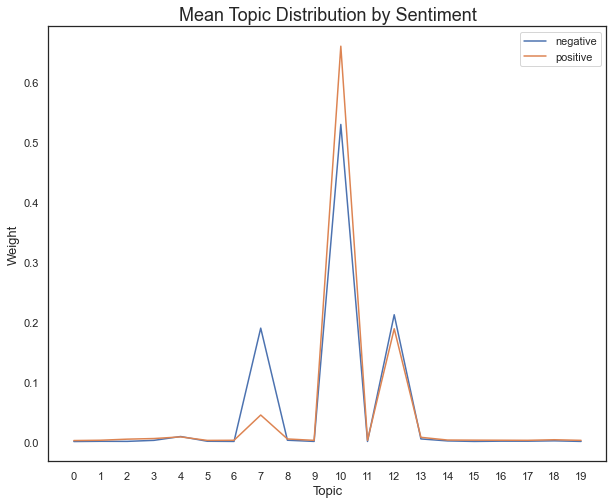

In [255]:
figure(figsize=(10, 8))
sns.lineplot(x=total_brand.index, y=0, data=total_brand)
sns.lineplot(x=total_brand.index, y=1, data=total_brand)
plt.legend(['negative', 'positive'])
plt.xlabel('Topic', fontsize = 13)
plt.ylabel('Weight', fontsize = 13)
plt.title('Mean Topic Distribution by Sentiment', fontsize = 18)

In [222]:
### part of speech graph
pos_adj = {'word':['great', 'good', 'other','better','easy', 'more', 'best', 'nice', 'little', 'new'], 'count':[34129, 24947, 14163, 10706, 9706, 9351, 8981, 8250, 7181, 7173]}
neg_adj = {'word':['good', 'other', 'great','same','new', 'more', 'better', 'bad', 'few', 'old'], 'count':[5590,4198,4046,2698,2521,2507,2435,1972,1911,1858]}
pos_noun = {'word':['tv','picture','quality','price','sound','screen','set','cable','time','remote'], 'count':[113482,41156,20497,16702,16276,15294,13811,10805,10693,10079]}
neg_noun = {'word':['tv','picture','screen','quality','time','problem','sound','set','remote','issue'], 'count':[32128,8073,5201,4109,3969,3684,3380,3155,2669,2465]}

In [227]:
pos_adj_df = pd.DataFrame(pos_adj)
neg_adj_df = pd.DataFrame(neg_adj)
pos_noun_df = pd.DataFrame(pos_noun)
neg_noun_df = pd.DataFrame(neg_noun)

In [ ]:
dict_list = [pos_adj, neg_adj, pos_noun, neg_noun]

<AxesSubplot:xlabel='word', ylabel='count'>

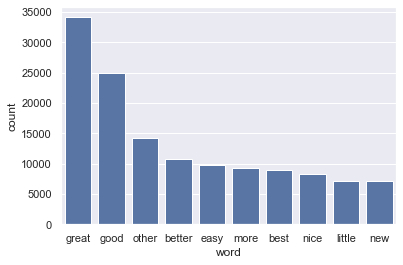

In [226]:
sns.barplot(x='word', y='count', data=pos_adj_df, color = 'b')

Text(0.5, 0, 'Negative Noun')

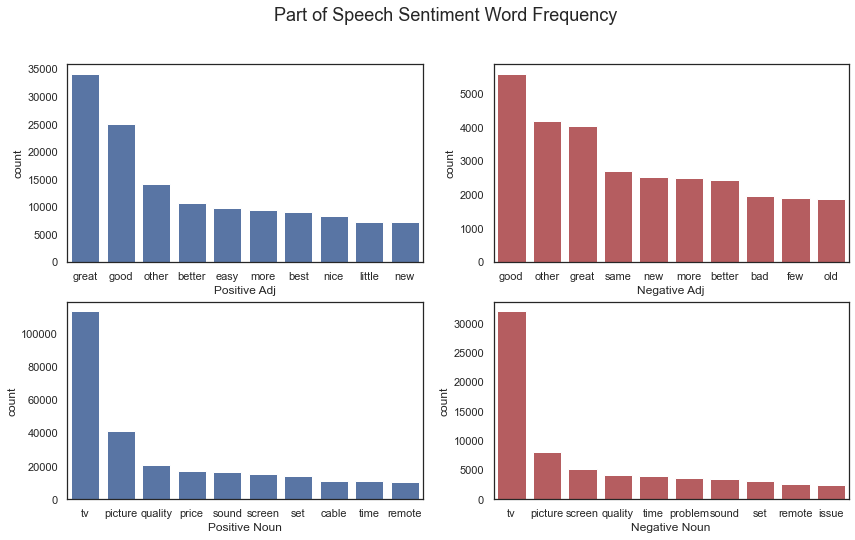

In [243]:
plt.figure(figsize = [14,8])
plt.suptitle('Part of Speech Sentiment Word Frequency', fontsize = 18)

plt.subplot(2,2,1)
sns.barplot(x='word', y='count', data=pos_adj_df, color = 'b')
plt.xlabel('Positive Adj')

plt.subplot(2,2,2)
sns.barplot(x='word', y='count', data=neg_adj_df, color = 'r')
plt.xlabel('Negative Adj')

plt.subplot(2,2,3)
sns.barplot(x='word', y='count', data=pos_noun_df, color = 'b')
plt.xlabel('Positive Noun')

plt.subplot(2,2,4)
sns.barplot(x='word', y='count', data=neg_noun_df, color = 'r')
plt.xlabel('Negative Noun')